In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdb
import surprise
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.model_selection import KFold
from surprise import model_selection
from surprise import prediction_algorithms
import pickle
from collections import defaultdict

In [2]:
#Question 1
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
print("Shape of movies dataframe " + str(movies_df.shape))
print("Shape of ratings dataframe " + str(ratings_df.shape))
movies_count = movies_df.shape[0]
users_count = ratings_df['userId'].value_counts().size
available_ratings_count = ratings_df.groupby(['userId', 'movieId']).ngroups
possible_ratings = movies_count * users_count
sparsity = available_ratings_count/possible_ratings
print("Number of movies " + str(movies_count))
print("Number of users " + str(users_count))
print("Number of available ratings " + str(available_ratings_count))
print("Number of possible ratings " + str(possible_ratings))
print("Sparsity of the ratings matrix is " + str(sparsity))

Shape of movies dataframe (9742, 3)
Shape of ratings dataframe (100836, 4)
Number of movies 9742
Number of users 610
Number of available ratings 100836
Number of possible ratings 5942620
Sparsity of the ratings matrix is 0.016968273253211548


Text(0, 0.5, 'Count')

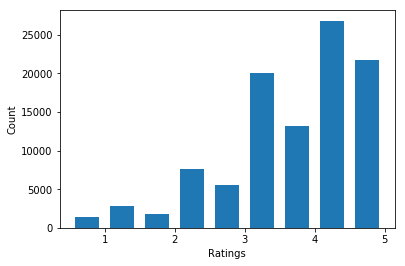

In [30]:
#Question 2
ratings_histogram = plt.hist(ratings_df['rating'], bins=np.linspace(0.5,5,10),rwidth = 0.7)
plt.xlabel('Ratings')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

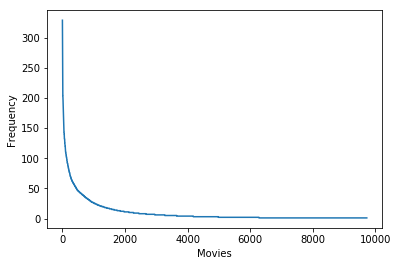

In [4]:
#Question 3
ratings_frequency = -np.sort(-ratings_df.groupby(['movieId']).size())[::1]
plt.plot(ratings_frequency)
plt.xlabel('Movies')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

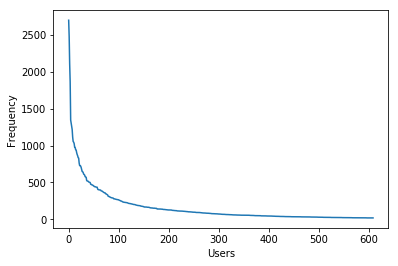

In [5]:
#Question 4
ratings_frequency = -np.sort(-ratings_df.groupby(['userId']).size())[::1]
plt.plot(ratings_frequency)
plt.xlabel('Users')
plt.ylabel('Frequency')

In [6]:
#Question 5


Text(0, 0.5, 'Count')

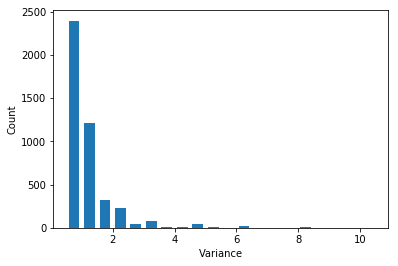

In [31]:
#Question 6 ----- check
ratings_frequency = ratings_df.groupby(['movieId'])
ratings_variance = ratings_frequency['rating'].agg(np.nanvar)
variance_histogram = plt.hist(ratings_variance,bins=np.arange(0.5,max(ratings_variance)+0.5,0.5).tolist(),rwidth = 0.7)
plt.xlabel('Variance')
plt.ylabel('Count')

In [8]:
#Question 7
#Question 8
#Question 9

In [9]:
#Question 10  ----check mink or maxk
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data = Dataset.load_from_file('ratings.csv', reader=reader)
sim_options = {'name': 'pearson',
               'user_based': True  #User-based
               }

In [10]:
rmse_values = []
mae_values = []
k_values = np.arange(2,101,2)
for k_temp in k_values:
    print("Model with k equal to " + str(k_temp))
    q10_algo = prediction_algorithms.knns.KNNWithMeans(k=k_temp, sim_options=sim_options)
    q10_model = model_selection.validation.cross_validate(q10_algo, data, cv=10, return_train_measures=True, n_jobs=-1)
    rmse_values.append(np.average(q10_model['test_rmse']))
    mae_values.append(np.average(q10_model['test_mae']))
    
    
    

Model with k equal to 2
Model with k equal to 4
Model with k equal to 6
Model with k equal to 8
Model with k equal to 10
Model with k equal to 12
Model with k equal to 14
Model with k equal to 16
Model with k equal to 18
Model with k equal to 20
Model with k equal to 22
Model with k equal to 24
Model with k equal to 26
Model with k equal to 28
Model with k equal to 30
Model with k equal to 32
Model with k equal to 34
Model with k equal to 36
Model with k equal to 38
Model with k equal to 40
Model with k equal to 42
Model with k equal to 44
Model with k equal to 46
Model with k equal to 48
Model with k equal to 50
Model with k equal to 52
Model with k equal to 54
Model with k equal to 56
Model with k equal to 58
Model with k equal to 60
Model with k equal to 62
Model with k equal to 64
Model with k equal to 66
Model with k equal to 68
Model with k equal to 70
Model with k equal to 72
Model with k equal to 74
Model with k equal to 76
Model with k equal to 78
Model with k equal to 80
Mode

In [182]:
A = np.sort(rmse_values)
idx = np.argsort(rmse_values)
print("k", '\t', "avg. rmse")     #table column headings
print("---", '\t', "-----")
k_values = np.arange(2,101,2)

for i in range(0,len(rmse_values)):
    print(k_values[idx[i]], '\t', A[i])

A = np.sort(mae_values)
idx = np.argsort(mae_values)

print("k", '\t', "avg. mae")     #table column headings
print("---", '\t', "-----")

for i in range(0,len(mae_values)):
    print(k_values[idx[i]], '\t', A[i])

k 	 avg. rmse
--- 	 -----
58 	 0.8882001018383286
30 	 0.8883339045991552
54 	 0.888405939649133
86 	 0.8887273502074216
56 	 0.888765663541338
50 	 0.888782858167892
80 	 0.8888152005522599
36 	 0.8889338156464366
38 	 0.8889434238391137
46 	 0.8890125310734567
42 	 0.8890288423096697
40 	 0.8891550701592218
70 	 0.8892748452788268
84 	 0.8893789032508271
62 	 0.8894259444197866
60 	 0.8894696800139889
76 	 0.8894940278066651
34 	 0.8895417784926091
68 	 0.8895869463423198
64 	 0.889599977042268
32 	 0.8896215922240067
98 	 0.88967610265898
94 	 0.8897083841002587
88 	 0.8897193769267501
82 	 0.8897293366977534
44 	 0.8897752667757881
100 	 0.8897960513743343
92 	 0.8898153490498555
96 	 0.8898556741934476
52 	 0.8899250739739175
72 	 0.8899607799691704
74 	 0.8899959983123754
20 	 0.8899985448947121
24 	 0.8900272111324247
66 	 0.8900366362212756
90 	 0.8900615945396639
48 	 0.890099442564442
78 	 0.8902352175404327
28 	 0.8904708606477119
22 	 0.8910254387617469
26 	 0.8911817750107

In [45]:
A = np.sort(rmse_values)
idx = np.argsort(rmse_values)
print('\n')
print(np.sort(rmse_values))

for i in range(0,len(rmse_values)):
    print('rmse is', A[i])
    print('idx is', idx[i])
    print('k is',k_values[idx[i]])



[0.8882001  0.8883339  0.88840594 0.88872735 0.88876566 0.88878286
 0.8888152  0.88893382 0.88894342 0.88901253 0.88902884 0.88915507
 0.88927485 0.8893789  0.88942594 0.88946968 0.88949403 0.88954178
 0.88958695 0.88959998 0.88962159 0.8896761  0.88970838 0.88971938
 0.88972934 0.88977527 0.88979605 0.88981535 0.88985567 0.88992507
 0.88996078 0.889996   0.88999854 0.89002721 0.89003664 0.89006159
 0.89009944 0.89023522 0.89047086 0.89102544 0.89118178 0.89162287
 0.89335599 0.89432523 0.89878033 0.90153963 0.90638884 0.9194834
 0.94366857 1.01450373]
rmse is 0.8882001018383286
idx is 28
k is 58
rmse is 0.8883339045991552
idx is 14
k is 30
rmse is 0.888405939649133
idx is 26
k is 54
rmse is 0.8887273502074216
idx is 42
k is 86
rmse is 0.888765663541338
idx is 27
k is 56
rmse is 0.888782858167892
idx is 24
k is 50
rmse is 0.8888152005522599
idx is 39
k is 80
rmse is 0.8889338156464366
idx is 17
k is 36
rmse is 0.8889434238391137
idx is 18
k is 38
rmse is 0.8890125310734567
idx is 22


In [ ]:
A = np.sort(mae_values)
idx = np.argsort(mae_values)
print('\n')
print(np.sort(mae_values))

for i in range(0,len(rmse_values)):
    print('rmse is', A[i])
    print('idx is', idx[i])
    print('k is',k_values[idx[i]])

In [20]:
i = 0
for k_temp in k_values:
    print("Model with k equal to " + str(k_temp))
    print("its rmse=",rmse_values[i])
    print("its mae=",mae_values[i])
    i +=1

k1 = np.argsort(np.array(rmse_values))
k2 = np.argsort(np.array(mae_values))
print("Increasing K with respect to rmse is")
print(k_values[k1])
print("Increasing K with respect to mae is")
print(k_values[k2])

print("minimum average RMSE",np.min(rmse_values))
print("minimum average MAE",np.min(mae_values))

print("k of minimum average RMSE",rmse_values.index(np.min(rmse_values)))
print("k of minimum average MAE",mae_values.index(np.min(mae_values)))

print(np.argsort(mae_values))
print(k_values[28])

Model with k equal to 2
its rmse= 1.0145037277108084
its mae= 0.7830809093947596
Model with k equal to 4
its rmse= 0.9436685748280162
its mae= 0.7242800010026688
Model with k equal to 6
its rmse= 0.9194833958635231
its mae= 0.7053351573107645
Model with k equal to 8
its rmse= 0.906388835744836
its mae= 0.6937133069067574
Model with k equal to 10
its rmse= 0.9015396320572806
its mae= 0.6889526916735058
Model with k equal to 12
its rmse= 0.898780325827351
its mae= 0.6861314844935569
Model with k equal to 14
its rmse= 0.8943252343980381
its mae= 0.6819402578435931
Model with k equal to 16
its rmse= 0.8933559909451129
its mae= 0.6813579041016021
Model with k equal to 18
its rmse= 0.8916228693711579
its mae= 0.679551657596976
Model with k equal to 20
its rmse= 0.8899985448947121
its mae= 0.6787253423631724
Model with k equal to 22
its rmse= 0.8910254387617469
its mae= 0.6791375672791954
Model with k equal to 24
its rmse= 0.8900272111324247
its mae= 0.6779592734157527
Model with k equal to 2

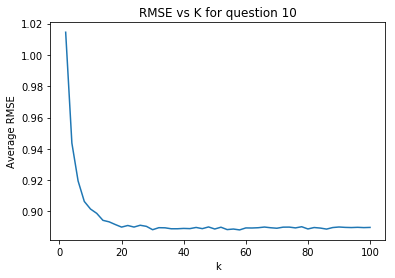

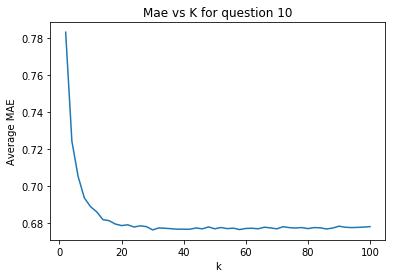

In [21]:
plt.plot(k_values,rmse_values)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.title('RMSE vs K for question 10')
plt.show()
plt.plot(k_values,mae_values)
plt.xlabel('k')
plt.ylabel('Average MAE')
plt.title('Mae vs K for question 10')
plt.show()

In [32]:
#Question 11
minimum_k = 24
#index=28
#print("steady state value of average RMSE",np.min(rmse_values[index]))
#print("steady state value of average MAE",np.min(mae_values[index]))

In [259]:
'''
def getPopular(testset,n):
    movie,freq=np.unique(np.array(testset)[:,1],return_counts=True)
    print(movie)
    print(freq)
    new_test = []
    a=zip(movie,freq)
    pop=map(lambda y:y[0],filter(lambda x:x[1]>n,a))
    t=filter(lambda x:x[1] in pop,testset)
    return t

def getUnpopular(testset,n):
    movie,freq=np.unique(np.array(testset)[:,1],return_counts=True)
    a=zip(movie,freq)
    pop=map(lambda y:y[0],filter(lambda x:x[1]<=n,a))
    t=filter(lambda x:x[1] in pop,testset)

    return t


def getHighVariance(testset):
    testset=getPopular(testset,4)
    ans=(pd.DataFrame.from_records(testset).groupby(1)[2].var(ddof=False))
    af=pd.DataFrame.from_records(np.transpose([ans.index,ans.values]))
    high_var=af[af[1]>2]
    high_var=high_var[0]
    high_var=list(high_var)
    t=filter(lambda x:x[1] in high_var,testset)
    return t
'''
#Question 12
movie_dict_entire={}
data_whole = data.build_full_trainset()
ratings_whole ={}
for data_x in data.raw_ratings:
        if data_x[1] not in movie_dict_entire:
            movie_dict_entire.setdefault(data_x[1],1)
            ratings_whole[data_x[1]] = [float(data_x[2])]
        else:
            movie_dict_entire[data_x[1]]+=1
            ratings_whole[data_x[1]].append(float(data_x[2]))

def getPopular_new(testset,k=2):
    movie_list=[]
    for test_data in testset:
        if test_data[1] in movie_dict_entire:
           val= movie_dict_entire[test_data[1]]
           if val>k:
             movie_list.append(test_data[1])

    testset2 = []
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)             
    return testset2

def getPopular(testset,k=2):
    movie_dict={}
    movie_list=[]
    for test_data in testset:
        if test_data[1] not in movie_dict:
            movie_dict.setdefault(test_data[1],1)
        else:
            movie_dict[test_data[1]]+=1
    for key,value in movie_dict.items():
        if value>k:
            movie_list.append(key)


    testset2 = []
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)             
    return testset2

def getUnpopular_new(testset):
    movie_list=[]
    for test_data in testset:
        if test_data[1] in movie_dict_entire:
            val= movie_dict_entire[test_data[1]]
            if val<=2:
             movie_list.append(test_data[1])
            
    testset2=[]
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)
    return testset2

def getUnpopular(testset):
    movie_dict={}
    movie_list=[]
    for test_data in testset:
        if test_data[1] not in movie_dict:
            movie_dict.setdefault(test_data[1],1)
        else:
            movie_dict[test_data[1]]+=1
    for key,value in movie_dict.items():
        if value<=2:
            movie_list.append(key)
    testset2=[]
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)
    return testset2

def getHighVariance_new(testset):
    #testset=getPopular_new(testset,5)
    movie_list = []
    for test_data in testset:
        if test_data[1] in movie_dict_entire:
            val= movie_dict_entire[test_data[1]]
            if val>=5:
                ratings_list = ratings_whole[test_data[1]]
                var =np.var(ratings_list)        
                if(var>=2):
                     movie_list.append(test_data[1])
    testset2 = []    
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)
    return testset2
def getHighVariance(testset):
    testset=getPopular(testset,5)
    movie_dict = {}
    movie_list = []
    for test_data in testset:
        if test_data[1] not in movie_dict:

            movie_dict.setdefault(test_data[1],[test_data[2]])
        else:
            movie_dict[test_data[1]].append(test_data[2])
    for key, value in movie_dict.items():
        var=np.var(value)
        if var>2:
            movie_list.append(key)
    testset2 = []
    for test_data in testset:
        if test_data[1] in movie_list:
            testset2.append(test_data)
    return testset2

In [134]:
'''
def popular_movie_trimmer(testdata):
    print(type(testdata))
    new_testdata = []
    for index in range(len(testdata)):
        if(testdata[index][2]>2):
            new_testdata.append(testdata[index])
    return new_testdata

def unpopular_movie_trimmer(testdata):
    new_testdata = []
    for index in range(len(testdata)):
        if(testdata[index][2]<=2):
            new_testdata.append(testdata[index])
    return new_testdata


def high_variance_movie_trimmer(testdata):
    testdata_df = pd.DataFrame(testdata)
    testdata_df_group = testdata_df.groupby([1]).filter(lambda x: len(x) >= 5 and  np.nanvar(x[2])>=2)
    new_testdata = [tuple(x) for x in testdata_df_group.values]
    return new_testdata
'''

'\ndef popular_movie_trimmer(testdata):\n    print(type(testdata))\n    new_testdata = []\n    for index in range(len(testdata)):\n        if(testdata[index][2]>2):\n            new_testdata.append(testdata[index])\n    return new_testdata\n\ndef unpopular_movie_trimmer(testdata):\n    new_testdata = []\n    for index in range(len(testdata)):\n        if(testdata[index][2]<=2):\n            new_testdata.append(testdata[index])\n    return new_testdata\n\n\ndef high_variance_movie_trimmer(testdata):\n    testdata_df = pd.DataFrame(testdata)\n    testdata_df_group = testdata_df.groupby([1]).filter(lambda x: len(x) >= 5 and  np.nanvar(x[2])>=2)\n    new_testdata = [tuple(x) for x in testdata_df_group.values]\n    return new_testdata\n'

In [227]:
def knn_train(trimmer):
    q12_rmse_values = []
    q12_mae_values = []
    k_values = np.arange(2,101,2)
    for k_temp in k_values:
        print("Model with k equal to " + str(k_temp))
        kf = KFold(n_splits=10)
        q12_algo = prediction_algorithms.knns.KNNWithMeans(k=k_temp, sim_options=sim_options)
        rmse_values_temp = []
        mae_values_temp = []
        pair_no = 1
        for trainset, testset in kf.split(data):
            print("----Pair " + str(pair_no))
            pair_no = pair_no + 1
            q12_algo.fit(trainset)
            trimmed_testset = trimmer(testset)
            print("Size of orginal testset " + str(len(testset)))
            print("Size of trimmed testset " + str(len(trimmed_testset)))  
            predictions = q12_algo.test(trimmed_testset)
            rmse_values_temp.append(accuracy.rmse(predictions))
            mae_values_temp.append(accuracy.mae(predictions))
        q12_rmse_values.append(np.average(rmse_values_temp))
        q12_mae_values.append(np.average(mae_values_temp))
    print("minimum average RMSE is ",np.min(q12_rmse_values))
    plt.plot(k_values,q12_rmse_values)
    plt.xlabel('k')
    plt.ylabel('Average RMSE')
    plt.show()
    plt.plot(k_values,q12_mae_values)
    plt.xlabel('k')
    plt.ylabel('Average MAE')
    plt.show()
    
    print("min avg mae is",np.min(q12_mae_values))
    print("min avg rmse is",np.min(q12_rmse_values))
    
    A = np.sort(q12_rmse_values)
    idx = np.argsort(q12_rmse_values)
    print("k", '\t', "avg. rmse")     #table column headings
    print("---", '\t', "-----")

    for i in range(0,len(q12_rmse_values)):
        #print('mae is', A[i])
        #print('idx is', idx[i])
        #print('k is',factor_values[idx[i]])
        print(k_values[idx[i]], '\t', A[i])

    A = np.sort(q12_mae_values)
    idx = np.argsort(q12_mae_values)

    print("k", '\t', "avg. mae")     #table column headings
    print("---", '\t', "-----")

    for i in range(0,len(q12_mae_values)):
        #print('mae is', A[i])
        #print('idx is', idx[i])
        #print('k is',factor_values[idx[i]])
        print(k_values[idx[i]], '\t', A[i])
    

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9494
RMSE: 1.0007
MAE:  0.7730
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9450
RMSE: 1.0027
MAE:  0.7777
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9472
RMSE: 1.0068
MAE:  0.7780
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9459
RMSE: 1.0060
MAE:  0.7794
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9497
RMSE: 1.0147
MAE:  0.7879
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset

RMSE: 0.8791
MAE:  0.6725
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9484
RMSE: 0.8755
MAE:  0.6693
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9485
RMSE: 0.8794
MAE:  0.6700
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9490
RMSE: 0.8848
MAE:  0.6743
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9476
RMSE: 0.8793
MAE:  0.6730
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9476
RMSE: 0.8763
MAE:  0.6703
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity mat

Size of orginal testset 10084
Size of trimmed testset 9524
RMSE: 0.8751
MAE:  0.6650
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9487
RMSE: 0.8658
MAE:  0.6603
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9499
RMSE: 0.8903
MAE:  0.6747
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9472
RMSE: 0.8833
MAE:  0.6742
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9462
RMSE: 0.8676
MAE:  0.6632
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9504
RMSE: 0.8713
MAE:  0.6636
----Pair 10
Computing the pearson similarity matri

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9471
RMSE: 0.8761
MAE:  0.6678
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9518
RMSE: 0.8641
MAE:  0.6617
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9502
RMSE: 0.8552
MAE:  0.6577
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9451
RMSE: 0.8787
MAE:  0.6701
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9442
RMSE: 0.8791
MAE:  0.6691
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9449
RMSE: 0.8685
MAE:  0.6600
----Pair 7
Compu

Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9438
RMSE: 0.8693
MAE:  0.6634
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9503
RMSE: 0.8767
MAE:  0.6631
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9513
RMSE: 0.8826
MAE:  0.6711
Model with k equal to 40
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9479
RMSE: 0.8757
MAE:  0.6665
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9528
RMSE: 0.8749
MAE:  0.6652
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9478
RMSE: 0.8806
MAE

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9489
RMSE: 0.8672
MAE:  0.6608
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9468
RMSE: 0.8789
MAE:  0.6703
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9486
RMSE: 0.8707
MAE:  0.6655
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9469
RMSE: 0.8785
MAE:  0.6659
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9503
RMSE: 0.8723
MAE:  0.6637
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9485
RMSE: 0.8795
MAE:  0.6743
Model with k eq

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9507
RMSE: 0.8797
MAE:  0.6691
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9430
RMSE: 0.8602
MAE:  0.6597
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9509
RMSE: 0.8690
MAE:  0.6641
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9509
RMSE: 0.8718
MAE:  0.6652
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9468
RMSE: 0.8693
MAE:  0.6621
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9462
RMSE: 0.8734
MAE:  0.6673
----Pair 8
Compu

Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9474
RMSE: 0.8865
MAE:  0.6748
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9481
RMSE: 0.8740
MAE:  0.6664
Model with k equal to 68
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9470
RMSE: 0.8664
MAE:  0.6649
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9486
RMSE: 0.8623
MAE:  0.6547
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9474
RMSE: 0.8830
MAE:  0.6707
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9457
RMSE: 0.8669
MAE

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9445
RMSE: 0.8709
MAE:  0.6628
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9446
RMSE: 0.8794
MAE:  0.6709
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9482
RMSE: 0.8758
MAE:  0.6688
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9497
RMSE: 0.8636
MAE:  0.6600
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9488
RMSE: 0.8751
MAE:  0.6659
Model with k equal to 78
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9455
RMSE: 0.8744
MAE

----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9470
RMSE: 0.8606
MAE:  0.6563
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9490
RMSE: 0.8608
MAE:  0.6567
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9488
RMSE: 0.8674
MAE:  0.6625
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9459
RMSE: 0.8838
MAE:  0.6715
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9448
RMSE: 0.8811
MAE:  0.6657
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed t

RMSE: 0.8834
MAE:  0.6709
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 9460
RMSE: 0.8726
MAE:  0.6670
Model with k equal to 96
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9493
RMSE: 0.8731
MAE:  0.6686
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9483
RMSE: 0.8740
MAE:  0.6677
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9487
RMSE: 0.8708
MAE:  0.6639
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 9505
RMSE: 0.8724
MAE:  0.6634
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity mat

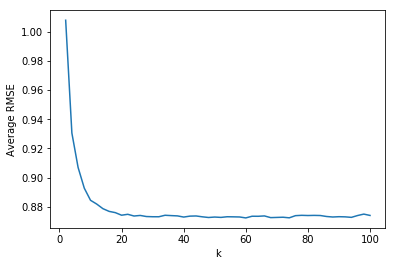

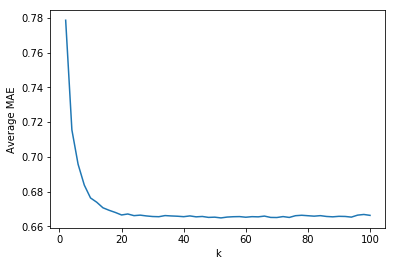

min avg mae is 0.6648602677916441
min avg rmse is 0.8722988328548293
k 	 avg. rmse
--- 	 -----
60 	 0.8722988328548293
74 	 0.8723650297214807
68 	 0.8725063844765177
48 	 0.8725919398638473
70 	 0.8726357241532121
52 	 0.872655294213164
94 	 0.8726797494139473
72 	 0.8727659893208589
40 	 0.8728852287687046
50 	 0.8728933839431425
88 	 0.8729239840123089
58 	 0.8729442298571074
92 	 0.8730272963756704
56 	 0.8730365707229335
46 	 0.8730565059152445
32 	 0.8730962261864423
54 	 0.8730974899835615
30 	 0.8731069553795354
90 	 0.8731323958905177
28 	 0.8732494549622721
86 	 0.873273565637233
64 	 0.8734198397132964
62 	 0.8734458411838781
42 	 0.8735231533647496
24 	 0.8736023377380105
44 	 0.8736348756230068
66 	 0.8736617380745872
38 	 0.8736854606070569
76 	 0.8738492409095283
36 	 0.8738826815551596
96 	 0.8739405523941677
84 	 0.8739432905007216
80 	 0.8739458948657693
26 	 0.873993503215277
100 	 0.8739976346283491
82 	 0.8740306681337687
78 	 0.8740753447593061
34 	 0.874117053248

In [264]:
reader = Reader(line_format="user item rating timestamp", sep=',',skip_lines=1)
# Load the data from the file using the reader format
data = Dataset.load_from_file('ml-latest-small/ml-latest-small/ratings.csv', reader=reader)
knn_train(getPopular_new)

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6831
RMSE: 1.0245
MAE:  0.7942
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6956
RMSE: 1.0313
MAE:  0.7967
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6855
RMSE: 1.0074
MAE:  0.7778
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6935
RMSE: 1.0143
MAE:  0.7869
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6908
RMSE: 1.0317
MAE:  0.7968
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset

RMSE: 0.8909
MAE:  0.6813
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6923
RMSE: 0.8844
MAE:  0.6751
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6922
RMSE: 0.8736
MAE:  0.6686
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6807
RMSE: 0.8704
MAE:  0.6634
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6870
RMSE: 0.8800
MAE:  0.6679
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6803
RMSE: 0.8612
MAE:  0.6617
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.8717
MAE:  0.6635
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6951
RMSE: 0.8644
MAE:  0.6596
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6940
RMSE: 0.8500
MAE:  0.6470
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6860
RMSE: 0.8649
MAE:  0.6541
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6897
RMSE: 0.8569
MAE:  0.6533
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6942
RMSE: 0.8592
MAE:  0.6557
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal test

RMSE: 0.8438
MAE:  0.6464
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6865
RMSE: 0.8520
MAE:  0.6520
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6863
RMSE: 0.8684
MAE:  0.6593
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6842
RMSE: 0.8478
MAE:  0.6488
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6857
RMSE: 0.8675
MAE:  0.6580
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6929
RMSE: 0.8560
MAE:  0.6535
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.8582
MAE:  0.6489
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6842
RMSE: 0.8440
MAE:  0.6443
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6943
RMSE: 0.8489
MAE:  0.6429
Model with k equal to 40
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6821
RMSE: 0.8731
MAE:  0.6643
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6861
RMSE: 0.8482
MAE:  0.6485
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6865
RMSE: 0.8571
MAE:  0.6491
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.8578
MAE:  0.6535
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6964
RMSE: 0.8666
MAE:  0.6602
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6878
RMSE: 0.8528
MAE:  0.6500
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6931
RMSE: 0.8568
MAE:  0.6513
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6941
RMSE: 0.8443
MAE:  0.6483
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6858
RMSE: 0.8586
MAE:  0.6512
Model with k equal to 50
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.8609
MAE:  0.6550
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6844
RMSE: 0.8657
MAE:  0.6566
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6864
RMSE: 0.8413
MAE:  0.6401
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6873
RMSE: 0.8537
MAE:  0.6504
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6953
RMSE: 0.8511
MAE:  0.6549
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6912
RMSE: 0.8550
MAE:  0.6494
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.8530
MAE:  0.6478
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6938
RMSE: 0.8647
MAE:  0.6544
Model with k equal to 68
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6853
RMSE: 0.8632
MAE:  0.6594
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6896
RMSE: 0.8603
MAE:  0.6536
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6882
RMSE: 0.8631
MAE:  0.6516
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6922
RMSE: 0.8575
MAE:  0.6538
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.8542
MAE:  0.6529
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6867
RMSE: 0.8619
MAE:  0.6553
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6865
RMSE: 0.8453
MAE:  0.6472
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6901
RMSE: 0.8619
MAE:  0.6542
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6911
RMSE: 0.8550
MAE:  0.6522
Model with k equal to 78
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6976
RMSE: 0.8728
MAE:  0.6632
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.8532
MAE:  0.6454
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6890
RMSE: 0.8443
MAE:  0.6451
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6905
RMSE: 0.8695
MAE:  0.6649
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6858
RMSE: 0.8577
MAE:  0.6502
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6900
RMSE: 0.8480
MAE:  0.6514
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 6799
RMSE: 0.8478
MAE:  0.6473
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.8623
MAE:  0.6597
Model with k equal to 96
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6829
RMSE: 0.8464
MAE:  0.6464
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6890
RMSE: 0.8648
MAE:  0.6591
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6821
RMSE: 0.8511
MAE:  0.6517
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6839
RMSE: 0.8583
MAE:  0.6557
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 6906
RMSE: 0.8530
MAE:  0.6503
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matr

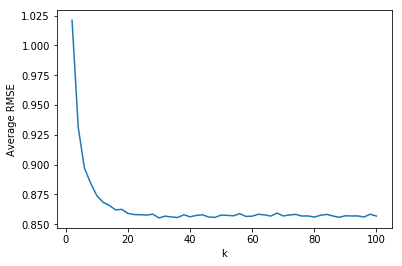

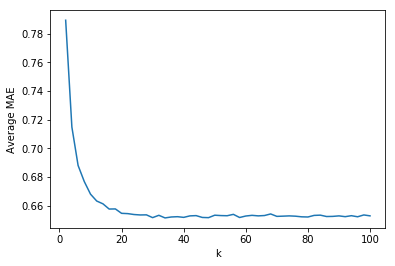

min avg mae is 0.6513446141002656
min avg rmse is 0.8552870263226039
k 	 avg. rmse
--- 	 -----
30 	 0.8552870263226039
36 	 0.8556272261729578
48 	 0.8557591420755436
88 	 0.8557886268713016
80 	 0.8560091803297449
46 	 0.8560122890782017
96 	 0.8560662664601606
34 	 0.8561011798669377
40 	 0.8562091972403246
58 	 0.8565426130087876
32 	 0.856761664726007
60 	 0.8567680333367053
66 	 0.8568342868110186
100 	 0.8568410149100147
76 	 0.8568690354060438
86 	 0.8569037609319559
92 	 0.8569071698302546
70 	 0.8569323048476509
78 	 0.8569372194584923
94 	 0.8569633783522891
54 	 0.8570630905766532
90 	 0.8570874603605396
52 	 0.8574070035270847
42 	 0.8574168683865441
82 	 0.8575154211519187
50 	 0.8576637607892905
26 	 0.8576855886335842
72 	 0.8577327489447942
64 	 0.8578064218747512
44 	 0.8578786530163545
38 	 0.8579339218826177
24 	 0.8579649487702155
22 	 0.8581237173042495
84 	 0.8582498837886579
74 	 0.8582669725544649
62 	 0.8583618414610218
98 	 0.8583712155046579
28 	 0.8584165537

In [174]:
#Question 12
knn_train(getPopular)

In [175]:
import os
file_path = os.path.expanduser('ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3190
RMSE: 1.0288
MAE:  0.7942
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3132
RMSE: 1.0039
MAE:  0.7696
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3174
RMSE: 1.0258
MAE:  0.7938
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3168
RMSE: 1.0045
MAE:  0.7793
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3290
RMSE: 1.0113
MAE:  0.7767
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset

----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3168
RMSE: 0.9579
MAE:  0.7259
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3196
RMSE: 0.9611
MAE:  0.7303
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3184
RMSE: 0.9606
MAE:  0.7412
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3104
RMSE: 0.9503
MAE:  0.7293
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3163
RMSE: 0.9456
MAE:  0.7232
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3264
RMSE: 0.9656
MAE:  0.7393
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3203
RMSE: 0.9398
MAE:  0.7154
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3279
RMSE: 0.9640
MAE:  0.7373
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3189
RMSE: 0.9584
MAE:  0.7268
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3155
RMSE: 0.9568
MAE:  0.7350
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed 

----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3233
RMSE: 0.9451
MAE:  0.7201
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3217
RMSE: 0.9432
MAE:  0.7264
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3212
RMSE: 0.9343
MAE:  0.7174
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3189
RMSE: 0.9632
MAE:  0.7304
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3195
RMSE: 0.9563
MAE:  0.7296
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed t

----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3213
RMSE: 0.9639
MAE:  0.7351
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3248
RMSE: 0.9649
MAE:  0.7400
Model with k equal to 40
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3143
RMSE: 0.9558
MAE:  0.7336
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3192
RMSE: 0.9665
MAE:  0.7376
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3186
RMSE: 0.9587
MAE:  0.7345
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3157
RMSE: 0.9670
MAE:  0.7459
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3155
RMSE: 0.9911
MAE:  0.7505
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3265
RMSE: 0.9666
MAE:  0.7342
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3140
RMSE: 0.9594
MAE:  0.7333
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3218
RMSE: 0.9540
MAE:  0.7324
Model with k equal to 50
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3167
RMSE: 0.9467
MAE:  0.7192
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3175
RMSE: 0.9788
MAE:  0.7459
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3190
RMSE: 0.9264
MAE:  0.7072
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3138
RMSE: 0.9687
MAE:  0.7384
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3180
RMSE: 0.9526
MAE:  0.7249
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed t

----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3130
RMSE: 0.9517
MAE:  0.7338
Model with k equal to 68
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3213
RMSE: 0.9286
MAE:  0.7085
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3078
RMSE: 0.9503
MAE:  0.7223
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3206
RMSE: 0.9656
MAE:  0.7441
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3183
RMSE: 0.9597
MAE:  0.7350
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3163
RMSE: 0.9498
MAE:  0.7211
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3190
RMSE: 0.9579
MAE:  0.7333
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3104
RMSE: 0.9705
MAE:  0.7458
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3180
RMSE: 0.9531
MAE:  0.7269
Model with k equal to 78
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3258
RMSE: 0.9573
MAE:  0.7350
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3219
RMSE: 0.9379
MAE:  0.7130
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3117
RMSE: 0.9754
MAE:  0.7448
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3131
RMSE: 0.9494
MAE:  0.7273
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3199
RMSE: 0.9541
MAE:  0.7273
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 3271
RMSE: 0.9494
MAE:  0.7245
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed t

----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3198
RMSE: 0.9385
MAE:  0.7211
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3268
RMSE: 0.9528
MAE:  0.7254
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3203
RMSE: 0.9494
MAE:  0.7269
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3214
RMSE: 0.9538
MAE:  0.7309
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 3165
RMSE: 0.9712
MAE:  0.7460
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed t

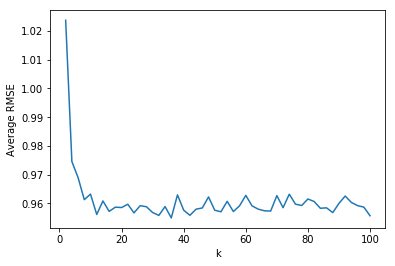

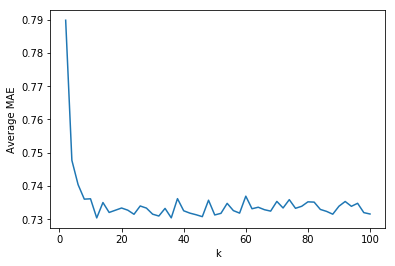

min avg mae is 0.7304257247077597
min avg rmse is 0.954987582469893
k 	 avg. rmse
--- 	 -----
36 	 0.954987582469893
100 	 0.9557400479820138
32 	 0.9558601720629758
42 	 0.9558959297623911
12 	 0.956186154537925
24 	 0.9567440584607025
88 	 0.9568373337140923
30 	 0.956865025611379
52 	 0.9571144574843128
56 	 0.9572079333783489
16 	 0.9572537783489234
68 	 0.9573658685683343
66 	 0.9574635791987252
50 	 0.9576592947216815
40 	 0.9576779175251096
44 	 0.9580278472369121
64 	 0.95803764742749
84 	 0.9583454609051373
46 	 0.9584497731641148
86 	 0.9584886402832072
72 	 0.9585467983387037
20 	 0.9585941950965609
18 	 0.9587274411322605
98 	 0.9587413524878092
28 	 0.9588728165470689
34 	 0.9589382307130746
62 	 0.9591779705888953
58 	 0.9592188333543534
26 	 0.959254106761964
96 	 0.9592548950224875
78 	 0.9593136827773225
22 	 0.959735883188991
76 	 0.9597604218674796
90 	 0.9600491053347516
94 	 0.9603583957102841
82 	 0.9607041921719477
54 	 0.9607558207059788
14 	 0.960881246754076
8

In [176]:
#Question 13
knn_train(getUnpopular)

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 593
RMSE: 1.1405
MAE:  0.8782
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 612
RMSE: 1.0931
MAE:  0.8324
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 605
RMSE: 1.1139
MAE:  0.8656
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 622
RMSE: 1.1115
MAE:  0.8556
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 587
RMSE: 1.0753
MAE:  0.8446
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 1008

----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 634
RMSE: 1.1245
MAE:  0.8536
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 595
RMSE: 1.1336
MAE:  0.8765
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 584
RMSE: 1.1288
MAE:  0.8759
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 596
RMSE: 1.0920
MAE:  0.8297
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 625
RMSE: 1.0788
MAE:  0.8415
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 638
RMSE: 1.1170
MAE:  0.8701
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 641
RMSE: 1.1384
MAE:  0.8766
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 581
RMSE: 1.1180
MAE:  0.8940
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 565
RMSE: 1.0842
MAE:  0.8371
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 621
RMSE: 1.1574
MAE:  0.8933
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 644
RMSE: 1.0906
MAE:  0.8244
Model with k equal to

Size of orginal testset 10084
Size of trimmed testset 580
RMSE: 1.1185
MAE:  0.8663
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 608
RMSE: 1.1295
MAE:  0.8814
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 634
RMSE: 1.1458
MAE:  0.8855
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 628
RMSE: 1.1116
MAE:  0.8667
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 611
RMSE: 1.1400
MAE:  0.8826
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 626
RMSE: 1.0897
MAE:  0.8260
----Pair 8
Computing the pearson similarity matrix...
Do

----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 621
RMSE: 1.1404
MAE:  0.8854
Model with k equal to 40
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 588
RMSE: 1.1161
MAE:  0.8719
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 614
RMSE: 1.1125
MAE:  0.8550
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 594
RMSE: 1.0703
MAE:  0.8284
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 615
RMSE: 1.1301
MAE:  0.8774
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10

----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 575
RMSE: 1.1044
MAE:  0.8550
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 638
RMSE: 1.1445
MAE:  0.8723
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 574
RMSE: 1.0400
MAE:  0.8107
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 549
RMSE: 1.0760
MAE:  0.8373
Model with k equal to 50
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 556
RMSE: 1.0901
MAE:  0.8388
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10

----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 612
RMSE: 1.1194
MAE:  0.8817
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 623
RMSE: 1.0473
MAE:  0.8165
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 572
RMSE: 1.0670
MAE:  0.8353
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 627
RMSE: 1.0969
MAE:  0.8573
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 575
RMSE: 1.0489
MAE:  0.8060
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testse

----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 592
RMSE: 1.1094
MAE:  0.8611
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 582
RMSE: 1.1317
MAE:  0.8548
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 587
RMSE: 1.1038
MAE:  0.8521
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 610
RMSE: 1.0822
MAE:  0.8360
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 576
RMSE: 1.0823
MAE:  0.8296
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testse

Size of orginal testset 10083
Size of trimmed testset 609
RMSE: 1.1001
MAE:  0.8609
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 616
RMSE: 1.1488
MAE:  0.8995
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 624
RMSE: 1.1060
MAE:  0.8398
Model with k equal to 78
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 612
RMSE: 1.1222
MAE:  0.8642
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 636
RMSE: 1.0854
MAE:  0.8422
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 619
RMSE: 1.0974
MAE:  0.8389
----Pair 4
Computing the pears

----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 580
RMSE: 1.0780
MAE:  0.8366
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 563
RMSE: 1.1153
MAE:  0.8400
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 573
RMSE: 1.0438
MAE:  0.8226
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 623
RMSE: 1.1213
MAE:  0.8622
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 635
RMSE: 1.1572
MAE:  0.8952
Model with k equal to 88
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 563
RMSE: 1.0875
MAE:  0.8549
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 631
RMSE: 1.0943
MAE:  0.8367
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 634
RMSE: 1.1260
MAE:  0.8661
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 636
RMSE: 1.1660
MAE:  0.9013
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 598
RMSE: 1.1774
MAE:  0.9112
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 577
RMSE: 1.1148
MAE:  0.8674
----Pair 9
Computing t

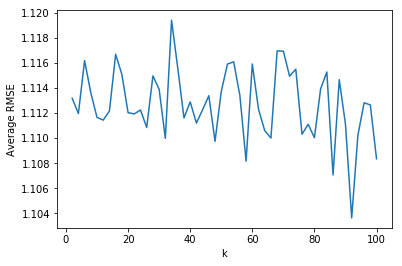

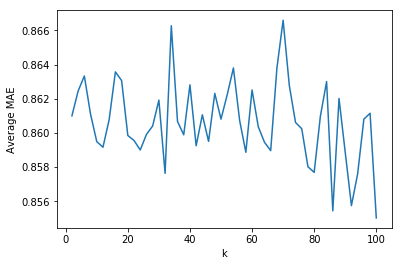

min avg mae is 0.855028457703597
min avg rmse is 1.103637988333709
k 	 avg. rmse
--- 	 -----
92 	 1.103637988333709
86 	 1.1070630481809292
58 	 1.1081641762109904
100 	 1.1083499832613721
48 	 1.1097449782147537
32 	 1.1099857814915477
66 	 1.1100085355449114
80 	 1.1100313963709163
94 	 1.1102337808452731
76 	 1.110309935076237
64 	 1.1105983530673904
26 	 1.1108447557996883
90 	 1.1111001423563311
78 	 1.1111035039351669
42 	 1.1112027742958746
12 	 1.1114357744366488
38 	 1.1116126469023366
10 	 1.1116520877031884
22 	 1.1119305320076076
4 	 1.111958663405766
20 	 1.1120293601992954
14 	 1.1121581020327596
24 	 1.1122430051977659
44 	 1.1122637743291928
62 	 1.1123004952181224
98 	 1.112645535008332
96 	 1.1128170882656931
40 	 1.112890817964388
2 	 1.1131838076919833
46 	 1.1133813035654818
56 	 1.1133947922192837
8 	 1.1136158284916657
50 	 1.113709948224533
30 	 1.1138969357830293
82 	 1.1139344913470173
88 	 1.1146625069155975
72 	 1.1149369312749193
28 	 1.1149616284822366
18 

In [265]:
knn_train(getUnpopular_new)

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
['8372', '74946', '3525', '7155', '68073', '7155', '5048', '54648', '1014', '5048', '86377', '110127', '85367', '27822', '3404', '74532', '179819', '1034', '3594', '4248', '3594', '27822', '619', '3404', '71520', '3099', '255', '4248']
Size of orginal testset 10084
Size of trimmed testset 28
RMSE: 1.5500
MAE:  1.2682
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
['86377', '85', '1866', '7669', '6686', '86347', '3404', '7155', '3594', '166534', '5480', '102', '1866', '7155', '6686']
Size of orginal testset 10084
Size of trimmed testset 15
RMSE: 1.6960
MAE:  1.3370
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
['1034', '179819', '85', '3099', '179819', '85367', '74946', '166534', '5048', '1034', '179819', '5480', '3099', '4821', '1468', '7155', '8372', '86320', '3594', '86347', '2382', '85367', 

['3525', '68073', '8372', '619', '1468', '71520', '102', '255', '3404', '1014', '5480', '3099', '1866', '3099', '1014', '86347', '74532', '7669', '7155', '7155', '85', '71520']
Size of orginal testset 10084
Size of trimmed testset 22
RMSE: 1.4564
MAE:  1.1942
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
['86320', '86320', '3404', '619', '255', '86320', '2382', '130634', '4821', '179819', '6686', '4821', '27822', '86347', '2382', '85367', '74532', '68073', '74946', '255', '213', '3525', '179819', '74532', '5909', '1483', '5909', '7155', '5480', '71520']
Size of orginal testset 10084
Size of trimmed testset 30
RMSE: 1.4600
MAE:  1.2040
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
['166534', '3594', '7155', '54648', '2381', '86320', '130634', '4248', '8372', '5480', '54648', '120635', '255', '86377', '213']
Size of orginal testset 10084
Size of trimmed testset 15
RMSE: 1.6584
MAE:  1.4319
----Pair 6
Comp

----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
['1483', '166534', '255', '2381', '213', '6686', '54648', '74532', '4248', '179819', '5048', '27822', '3525', '54648', '4248', '1034', '1034', '27822', '86377', '619', '7669', '2381', '1014', '5480']
Size of orginal testset 10084
Size of trimmed testset 24
RMSE: 1.2278
MAE:  0.9750
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
['5480', '5909', '86347', '102', '85367', '85', '7155', '179819', '6686', '213', '1483', '1034', '3594', '4821', '8372', '1468', '86347', '166534', '130634', '1866', '3525', '86320', '2381', '1014', '7669', '179819', '1483', '3594', '5909']
Size of orginal testset 10084
Size of trimmed testset 29
RMSE: 2.0561
MAE:  1.6945
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
['74532', '255', '130634', '179819', '7155', '8372', '86377', '85367', '74946', '2381', '7155', '179819', '130634', '71520', '766

['4821', '3099', '110127', '619', '8372', '7155', '110127', '166534', '5480', '1483', '86347', '7669', '86377', '86377', '5048', '179819', '54648', '4248', '179819', '7669', '3525', '255', '2381', '3525']
Size of orginal testset 10083
Size of trimmed testset 24
RMSE: 1.5414
MAE:  1.2843
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
['5048', '86377', '1034', '54648', '1468', '1866', '86347', '74946', '71520', '255', '3594', '86377', '255', '86320', '120635', '74946', '1866', '5048', '5909', '3404', '7155', '1483', '3099', '166534', '3099', '1468', '68073']
Size of orginal testset 10083
Size of trimmed testset 27
RMSE: 1.7964
MAE:  1.3606
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
['1483', '110127', '120635', '85367', '1483', '2382', '213', '166534', '7669', '27822', '85', '71520', '179819', '102', '3594', '8372', '2382', '2382', '85', '7669', '120635']
Size of orginal testset 10083
Size of trimmed tes

Done computing similarity matrix.
['5480', '4248', '5048', '1483', '3525', '3404', '619', '5480', '3099', '8372', '166534', '1483', '85367', '86320', '179819', '27822', '110127', '86347', '74946', '5909', '74532', '3099', '1034', '2382', '179819', '5048', '54648', '7669', '120635']
Size of orginal testset 10083
Size of trimmed testset 29
RMSE: 1.4938
MAE:  1.1987
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
['1866', '71520', '3594', '68073', '5909', '1866', '2382', '110127', '1483', '1034', '1483', '130634', '6686', '1483', '85', '86320', '255', '255', '6686', '213', '71520', '3099', '54648', '179819', '86347', '86347', '7155', '179819', '1034', '213', '5048', '179819', '255']
Size of orginal testset 10083
Size of trimmed testset 33
RMSE: 1.5467
MAE:  1.2976
Model with k equal to 20
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
['86347', '74532', '4248', '3525', '255', '1866', '68073', '213', '86320',

----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
['1034', '86347', '213', '68073', '3525', '5048', '54648', '102', '3525', '4248', '2381', '4248', '4821', '179819', '255', '5909', '68073', '120635', '85', '179819', '1468', '3099', '7669', '213', '130634', '4248', '5480', '85', '179819', '120635', '74946']
Size of orginal testset 10084
Size of trimmed testset 31
RMSE: 1.4176
MAE:  1.1260
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
['3594', '7669', '3099', '2381', '2381', '1034', '179819', '166534', '110127', '102', '6686', '74946', '179819', '1483', '7669', '166534', '27822', '74532', '255', '71520', '1483', '85367', '130634', '5909', '2381', '1483', '86347', '3404']
Size of orginal testset 10084
Size of trimmed testset 28
RMSE: 1.5108
MAE:  1.2633
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
['68073', '86377', '86320', '213', '86320', '5048', '2382', '5480', '76

----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
['3594', '1866', '102', '2381', '6686', '8372', '68073', '2382', '74946', '619', '2381', '7669', '4821', '1866', '1866', '5480', '8372', '6686', '54648', '86347', '54648', '130634', '619', '1034']
Size of orginal testset 10084
Size of trimmed testset 24
RMSE: 1.5395
MAE:  1.2319
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
['5909', '120635', '1034', '85', '1468', '1866', '5909', '85367', '7669', '85367', '74946', '3525', '85', '68073', '3099', '213', '86347', '74532', '213']
Size of orginal testset 10084
Size of trimmed testset 19
RMSE: 1.4859
MAE:  1.1884
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
['4248', '86347', '179819', '1866', '74532', '74946', '68073', '255', '179819', '54648', '74946', '166534', '120635', '179819', '85', '102', '7155', '3099', '1468', '110127', '130634', '6686', '86377', '7669', '3099', 

Done computing similarity matrix.
['179819', '179819', '85367', '2381', '54648', '619', '179819', '3594', '1866', '3525', '2381', '68073', '102', '110127', '179819', '1468']
Size of orginal testset 10084
Size of trimmed testset 16
RMSE: 1.2550
MAE:  1.0647
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
['110127', '5048', '1483', '8372', '179819', '7669', '1034', '7669', '2381', '102', '86320', '5480', '71520', '3404', '1468', '74946', '255', '1483', '5480', '3525', '86377', '1034', '1866', '85']
Size of orginal testset 10084
Size of trimmed testset 24
RMSE: 1.5032
MAE:  1.2098
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
['86347', '86347', '213', '4248', '74946', '130634', '4248', '619', '7669', '74946', '74946', '85', '85', '71520', '3525', '3099', '54648', '1483', '7155', '3594', '27822', '86377', '110127', '2382', '7155', '3099', '85367', '130634', '85367', '86320']
Size of orginal testset 10083
Size

Computing the pearson similarity matrix...
Done computing similarity matrix.
['6686', '3404', '102', '1468', '5909', '3099', '110127', '166534', '5480', '1468', '4248', '3594', '74946', '7155', '54648', '71520', '3594', '1483', '86320', '71520', '1483']
Size of orginal testset 10083
Size of trimmed testset 21
RMSE: 1.4013
MAE:  1.1314
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
['5048', '3099', '86347', '7669', '54648', '130634', '7155', '54648', '213', '166534', '7155', '27822', '4821', '110127', '85367', '179819', '213', '1866', '5480', '3404', '1483', '3404', '3594', '86320', '3099', '102', '179819', '54648', '102', '4821']
Size of orginal testset 10083
Size of trimmed testset 30
RMSE: 1.4610
MAE:  1.1598
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
['1483', '68073', '85', '4248', '6686', '2382', '1034', '74946', '85', '2381', '4821', '85', '74532', '86347', '619', '1483', '130634', '74946', '1306

Done computing similarity matrix.
['86320', '7669', '619', '74532', '255', '4248', '85', '86320', '120635', '120635', '71520', '110127', '1034', '213', '179819', '102', '86377', '85367', '1014', '6686', '179819', '68073', '7155', '166534', '86320', '86377', '3099']
Size of orginal testset 10083
Size of trimmed testset 27
RMSE: 1.6004
MAE:  1.2701
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
['619', '3099', '3404', '74946', '74532', '1468', '6686', '85367', '1014', '102', '86347', '7155', '255', '3525', '54648', '5048', '1483', '179819', '2382', '1014', '213', '54648', '85367', '4248', '1866', '1866', '5909', '166534', '5048', '3099', '619', '213']
Size of orginal testset 10083
Size of trimmed testset 32
RMSE: 1.6600
MAE:  1.3929
Model with k equal to 42
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
['85', '5048', '3404', '5048', '3099', '27822', '179819', '85', '74946', '1483', '619', '1468', '1014', 

----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
['110127', '3525', '619', '179819', '27822', '85367', '74946', '5480', '5048', '86320', '179819', '74946', '2381', '1034']
Size of orginal testset 10084
Size of trimmed testset 14
RMSE: 1.5646
MAE:  1.1719
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
['1866', '166534', '2381', '7155', '3099', '1014', '4821', '255', '166534', '1483', '130634', '85', '1034', '179819', '4248', '4248', '6686', '86347', '68073', '7155', '86377', '1468']
Size of orginal testset 10084
Size of trimmed testset 22
RMSE: 1.8659
MAE:  1.5407
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
['5909', '166534', '2382', '3404', '3099', '5909', '27822', '54648', '3099', '166534', '86377', '1483', '5480', '213', '2381', '74946', '2382', '86377', '74532', '7155', '3404', '86377', '3525', '4821', '85', '6686', '3099', '255', '5909', '54648', '74946', '146

Done computing similarity matrix.
['1866', '213', '213', '166534', '3594', '1014', '255', '179819', '1483', '179819', '2381', '86320', '166534', '166534', '166534', '3099', '3404', '6686', '7669']
Size of orginal testset 10084
Size of trimmed testset 19
RMSE: 1.4080
MAE:  1.0763
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
['1468', '3594', '5048', '27822', '102', '130634', '86377', '1483', '1483', '85367', '3404', '85', '85', '4821', '1483', '3525', '85', '74946', '3525', '74946', '110127', '86347', '86377', '85367']
Size of orginal testset 10084
Size of trimmed testset 24
RMSE: 1.6798
MAE:  1.3371
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
['1014', '5048', '86320', '179819', '3594', '74532', '5909', '54648', '179819', '8372', '27822', '1014', '71520', '110127', '86377', '74532', '86320', '120635', '6686', '85367']
Size of orginal testset 10084
Size of trimmed testset 20
RMSE: 1.5027
MAE:  1.2337
--

----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
['68073', '86377', '7155', '1483', '54648', '1014', '213', '5048', '619', '2381', '5480', '27822', '85', '120635', '255', '7669', '1468', '1866', '85367', '213']
Size of orginal testset 10084
Size of trimmed testset 20
RMSE: 1.7895
MAE:  1.4859
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
['85', '86320', '85367', '4821', '120635', '74532', '166534', '86377', '4248', '4821', '1866', '255', '179819', '5048', '85', '71520', '2382', '5909', '5480', '110127', '68073', '71520', '1483']
Size of orginal testset 10084
Size of trimmed testset 23
RMSE: 1.6561
MAE:  1.3016
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
['6686', '213', '7155', '54648', '1866', '3404', '74946', '179819', '85367', '1034', '179819', '1866', '3525', '3594', '213', '179819', '2381', '3404', '5909', '1483', '86347', '1014', '86377', '6686']
Size of org

----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
['8372', '1866', '5480', '2381', '130634', '7669', '1866', '7155', '213', '1483', '71520', '5909', '8372', '74532', '6686', '86377', '1483', '71520', '166534']
Size of orginal testset 10083
Size of trimmed testset 19
RMSE: 1.9680
MAE:  1.5250
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
['110127', '1866', '179819', '7669', '71520', '3525', '120635', '1483', '130634', '27822', '213', '86320', '619', '6686', '27822', '4821', '7155', '179819', '4248', '130634', '3594', '179819', '7155']
Size of orginal testset 10083
Size of trimmed testset 23
RMSE: 1.8765
MAE:  1.5433
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
['74532', '1483', '166534', '6686', '3404', '6686', '3594', '619', '166534', '1468', '3594', '85', '1034', '74532', '619', '179819', '255', '213', '1034', '3525', '68073', '179819', '74946', '255', '85367', '1

----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
['179819', '6686', '1014', '179819', '102', '86320', '3099', '27822', '1483', '74946', '110127', '2381', '619', '74946', '619', '4248', '7669', '3404', '7155', '8372', '1034', '5048', '85367', '179819', '85', '102']
Size of orginal testset 10083
Size of trimmed testset 26
RMSE: 1.4679
MAE:  1.2894
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
['74532', '3525', '1468', '213', '8372', '130634', '86377', '2382', '86320', '5480', '3099', '68073', '2381', '179819', '110127', '86377', '86347', '4821', '1468', '110127', '5480']
Size of orginal testset 10083
Size of trimmed testset 21
RMSE: 1.6951
MAE:  1.2123
Model with k equal to 64
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
['3525', '1483', '1034', '166534', '179819', '3404', '166534', '5048', '74532', '179819', '6686', '5048', '71520', '7155', '213', '619', '110127',

Done computing similarity matrix.
['2382', '1014', '7155', '5909', '3525', '86377', '5048', '4821', '74946', '255', '3099', '2381', '120635', '130634', '255', '5909', '74946', '110127', '2381', '3099', '27822', '255', '74946', '1866', '7155', '8372', '86320']
Size of orginal testset 10084
Size of trimmed testset 27
RMSE: 1.5132
MAE:  1.1964
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
['74532', '85', '213', '86377', '3404', '71520', '54648', '179819', '179819', '86320', '74946', '1866', '8372', '130634', '2382', '179819', '1483', '85367', '86377', '619', '8372', '85367', '4821', '68073', '1014', '1483', '179819', '3594', '3525', '102', '85367', '1483']
Size of orginal testset 10084
Size of trimmed testset 32
RMSE: 1.3871
MAE:  1.0500
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
['27822', '3404', '6686', '86347', '85', '7669', '5909', '8372', '7155', '179819', '255', '71520', '102', '4248', '102', '504

Done computing similarity matrix.
['5480', '255', '86347', '1866', '179819', '130634', '1014', '74946', '85', '8372', '1014', '7669', '7155', '3594', '213', '3594', '179819', '120635', '54648', '130634', '3404', '179819', '255', '7669', '1014']
Size of orginal testset 10084
Size of trimmed testset 25
RMSE: 1.4442
MAE:  1.0896
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
['3594', '5048', '1014', '85367', '2381', '255', '3099', '110127', '85367', '3525', '1866', '3525', '7669', '85367', '4821', '3404', '110127', '4248', '179819', '7155', '71520']
Size of orginal testset 10084
Size of trimmed testset 21
RMSE: 1.6749
MAE:  1.4219
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
['1483', '120635', '5909', '5048', '3099', '213', '27822', '8372', '6686', '5048', '166534', '27822', '102', '7155', '1034', '179819', '7155', '619', '86320', '74532', '3525', '68073', '74946', '7155', '1468']
Size of orginal testset 1

Done computing similarity matrix.
['130634', '213', '102', '1034', '255', '619', '3099', '2381', '3594', '85367', '68073', '68073', '1014', '5480', '5909', '7155', '166534']
Size of orginal testset 10084
Size of trimmed testset 17
RMSE: 1.1481
MAE:  0.9835
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
['110127', '86347', '179819', '74946', '4248', '2381', '213', '7155', '130634', '5480', '179819', '2382', '179819', '4821', '4821', '86320', '2382', '86347', '1483', '85367', '7669', '4821', '110127']
Size of orginal testset 10084
Size of trimmed testset 23
RMSE: 1.3591
MAE:  1.0258
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
['7669', '179819', '74946', '74946', '74946', '85', '86347', '68073', '1866', '7155', '102', '85', '54648', '130634', '86377', '74946', '8372', '120635', '179819', '1468', '7669', '54648', '4248', '85']
Size of orginal testset 10083
Size of trimmed testset 24
RMSE: 1.6231
MAE:  1.39

Done computing similarity matrix.
['71520', '1014', '130634', '5480', '68073', '4821', '102', '619', '179819', '5048', '3404', '86320', '5480', '7155', '7669', '86320', '213', '74946', '8372', '6686', '1866', '2381', '74532', '1483', '1014', '179819', '3099', '71520', '3594', '3404', '213']
Size of orginal testset 10083
Size of trimmed testset 31
RMSE: 1.5204
MAE:  1.2113
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
['4248', '179819', '74946', '1866', '85', '2382', '255', '8372', '120635', '3525', '8372', '68073', '4248', '1034', '120635', '1034', '3099', '27822', '27822', '2382', '3099', '1014', '4248', '179819', '8372', '54648', '166534']
Size of orginal testset 10083
Size of trimmed testset 27
RMSE: 1.2949
MAE:  1.0617
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
['120635', '213', '4821', '5480', '86377', '86320', '1483', '7669', '2382', '74946', '102', '3099', '85', '86377', '7155', '3594', '1483'

----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
['5480', '1866', '2381', '4821', '2381', '3525', '3594', '3525', '179819', '1866', '7669', '1468', '5480', '7669', '3404', '8372', '619', '85', '86320', '102', '4821', '8372', '27822', '6686']
Size of orginal testset 10083
Size of trimmed testset 24
RMSE: 1.1996
MAE:  0.9643
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
['6686', '54648', '74946', '1483', '27822', '619', '1468', '3404', '255', '85', '86377', '7669', '1034', '1483', '3099', '1866', '4248', '2382', '85367', '102', '1483', '120635', '255', '85367', '85367']
Size of orginal testset 10083
Size of trimmed testset 25
RMSE: 1.6113
MAE:  1.2754
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
['5480', '179819', '27822', '130634', '179819', '1483', '3404', '166534', '74532', '166534', '255', '1014', '3099', '86377', '110127']
Size of orginal testset 10083
Size of

----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
['5480', '27822', '1034', '5048', '85', '1034', '102', '3525', '85', '54648', '8372', '86320', '1468', '85', '86320', '3594', '71520', '85', '86377', '1866', '7155', '74946', '6686', '120635']
Size of orginal testset 10083
Size of trimmed testset 24
RMSE: 1.4684
MAE:  1.2004
Model with k equal to 90
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
['7155', '619', '5909', '27822', '1468', '3404', '1468', '3594', '3594', '85367', '130634', '85', '86347', '3099', '1866', '1483', '179819', '54648', '74946', '1483', '130634', '1483', '7669', '74532', '120635', '3594', '1468', '71520', '85', '86347']
Size of orginal testset 10084
Size of trimmed testset 30
RMSE: 1.8380
MAE:  1.5805
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
['179819', '3525', '71520', '2382', '7155', '255', '110127', '68073', '5048', '6686', '5048', '2782

Done computing similarity matrix.
['179819', '1483', '74532', '619', '5048', '102', '1483', '102', '71520', '68073', '74532', '1014', '1014', '619', '179819', '1468', '3525', '85', '1866', '74946', '1866', '74946', '213', '74946', '7669', '86347']
Size of orginal testset 10084
Size of trimmed testset 26
RMSE: 1.5214
MAE:  1.2653
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
['1468', '86347', '7669', '5909', '3594', '3099', '68073', '68073', '71520', '1866', '86347', '179819', '255', '4821', '3404', '2382', '7155', '7155', '5480', '120635', '5909', '5048', '85', '3099', '27822']
Size of orginal testset 10084
Size of trimmed testset 25
RMSE: 1.4202
MAE:  1.1214
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
['85367', '1483', '1866', '179819', '3594', '5909', '6686', '619', '3404', '6686', '1014', '3404', '179819', '85367', '130634', '166534', '74532', '3404', '4248', '2381', '110127', '71520', '166534', '7

----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
['68073', '7669', '1866', '86377', '86347', '166534', '255', '7155', '6686', '5048', '120635', '5048', '4248', '1483', '1866', '1866']
Size of orginal testset 10084
Size of trimmed testset 16
RMSE: 1.5167
MAE:  1.2885
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
['5909', '110127', '86320', '1014', '27822', '110127', '1483', '3594', '166534', '86320', '1014', '110127', '179819', '1468', '166534', '1468', '6686', '3594', '2382', '2381']
Size of orginal testset 10084
Size of trimmed testset 20
RMSE: 1.7475
MAE:  1.4447
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
['179819', '3404', '86347', '27822', '102', '74946', '74946', '213', '179819', '85367', '85', '3525', '86347', '68073', '255', '5909', '213', '120635']
Size of orginal testset 10084
Size of trimmed testset 18
RMSE: 1.9776
MAE:  1.3789
----Pair 7
Computing the

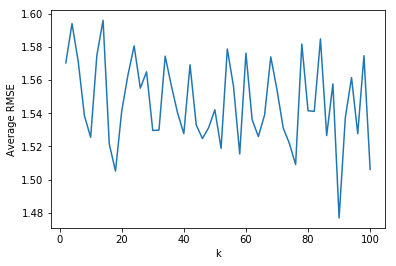

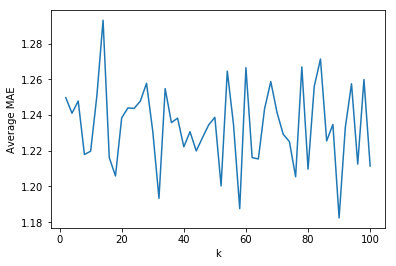

min avg mae is 1.1823961289000544
min avg rmse is 1.476997347745764
k 	 avg. rmse
--- 	 -----
90 	 1.476997347745764
18 	 1.5052047955484535
100 	 1.50616242553092
76 	 1.5091217738216858
58 	 1.515485617467492
52 	 1.5188652221198344
16 	 1.5215004747871714
74 	 1.5218319371152222
46 	 1.5247900908907974
10 	 1.5255402759530512
64 	 1.5259911942275255
86 	 1.5265834405205114
96 	 1.5276901058170869
40 	 1.5277595928684227
30 	 1.5296535479581572
32 	 1.5298652249486016
72 	 1.5311877626626114
48 	 1.5313600260253382
44 	 1.5329500312398086
62 	 1.5361587649080812
92 	 1.5372873894096553
8 	 1.5385095905467299
66 	 1.538919981318619
38 	 1.5401559563726859
82 	 1.5411406360622955
20 	 1.5412020197402467
80 	 1.5415157653764915
50 	 1.5421075326190217
70 	 1.5541849598944066
26 	 1.555110931859311
56 	 1.5562613667015621
36 	 1.5564691863698017
88 	 1.5576850696175772
94 	 1.561468801799995
22 	 1.562908439807884
28 	 1.5649880959258164
42 	 1.569203761590552
2 	 1.570346550197986
6 	 1

In [266]:
#Question 14

knn_train(getHighVariance_new)

In [35]:
import random

raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]
data.raw_ratings = A_raw_ratings
trainset = data.build_full_trainset()
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B

Computing the pearson similarity matrix...
Done computing similarity matrix.
Plotting the ROC curve for threshold2.5
auc is =  0.7844912358504249


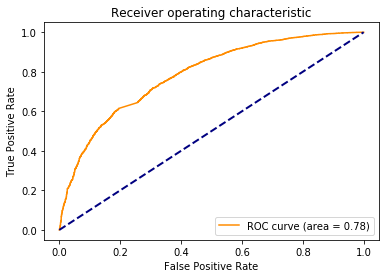

Plotting the ROC curve for threshold3
auc is =  0.7778681849634175


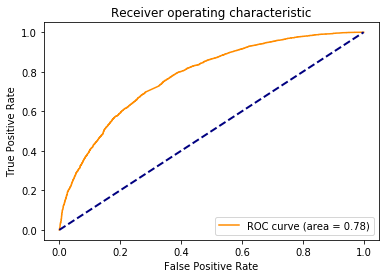

Plotting the ROC curve for threshold3.5
auc is =  0.7730447553934093


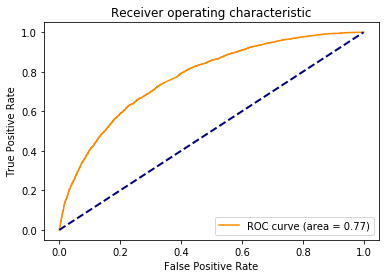

Plotting the ROC curve for threshold4
auc is =  0.7829690010357027


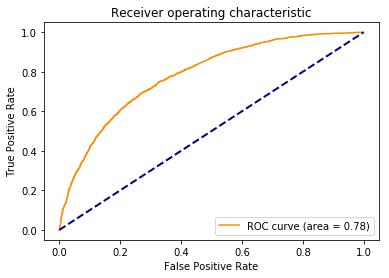

In [52]:
#Question 15
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(thresholds,y_true,y_pred):
    y_true_binary = []
    fpr =[]
    tpr = []
    for t in thresholds:
        y_true_binary = []
        for x in y_true:
            if(x>t):
                  y_true_binary.append(1)
            else:
                y_true_binary.append(-1)
        
        print("Plotting the ROC curve for threshold"+str(t))
        fpr_val, tpr_val, _= roc_curve(y_true_binary, y_pred)
        fpr.append(fpr_val)
        tpr.append(tpr_val)
        roc_auc=auc(fpr_val, tpr_val)
        print("auc is = ",roc_auc)
        plt.figure()
        lw = 2
        plt.plot(fpr_val, tpr_val, color='darkorange',
                  label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
q10_algo = prediction_algorithms.knns.KNNWithMeans(k=minimum_k, sim_options=sim_options)
q10_algo.fit(trainset)
predictions = q10_algo.test(testset)
thresholds = [2.5, 3, 3.5, 4]
y_true_test =[] 
y_pred_test =[] 
for x  in testset:
    y_true_test.append(x[2])
for x  in predictions:
    y_pred_test.append(x.est)
plot_roc_curves(thresholds,y_true_test,y_pred_test)

Model with factor equal to 2
Model with factor equal to 4
Model with factor equal to 6
Model with factor equal to 8
Model with factor equal to 10
Model with factor equal to 12
Model with factor equal to 14
Model with factor equal to 16
Model with factor equal to 18
Model with factor equal to 20
Model with factor equal to 22
Model with factor equal to 24
Model with factor equal to 26
Model with factor equal to 28
Model with factor equal to 30
Model with factor equal to 32
Model with factor equal to 34
Model with factor equal to 36
Model with factor equal to 38
Model with factor equal to 40
Model with factor equal to 42
Model with factor equal to 44
Model with factor equal to 46
Model with factor equal to 48
Model with factor equal to 50


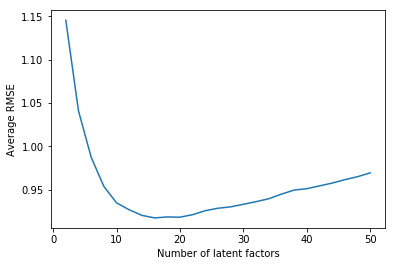

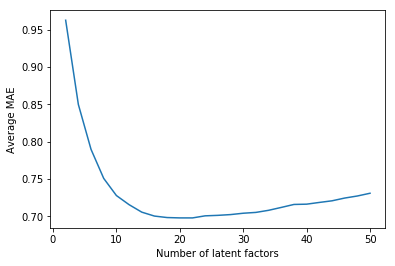

In [53]:
#Question 17
q16_rmse_values = []
q16_mae_values = []
factor_values = np.arange(2,51,2)
for factor_temp in factor_values:
    print("Model with factor equal to " + str(factor_temp))
    q16_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=factor_temp,biased =False)
    q16_model = model_selection.validation.cross_validate(q16_algo, data, cv=10, return_train_measures=True, n_jobs=-1)
    q16_rmse_values.append(np.average(q16_model['test_rmse']))
    q16_mae_values.append(np.average(q16_model['test_mae']))
plt.plot(factor_values,q16_rmse_values)
plt.xlabel('Number of latent factors')
plt.ylabel('Average RMSE')
plt.show()
plt.plot(factor_values,q16_mae_values)
plt.xlabel('Number of latent factors')
plt.ylabel('Average MAE')
plt.show()

In [56]:
#Question 18
'''
k1 = np.argsort(np.array(q16_rmse_values))
k2 = np.argsort(np.array(q16_mae_values))
print(len(q16_mae_values))
print((factor_values))
print(factor_values[k1])
print(factor_values[k2])
'''
print("minimum average RMSE",np.min(q16_rmse_values))
print("minimum average MAE",np.min(q16_mae_values))



minimum average RMSE 0.9173699829489322
minimum average MAE 0.6980732169450112


In [169]:
A = np.sort(q16_mae_values)
idx = np.argsort(q16_mae_values)
print('\n')
print(np.sort(q16_mae_values))

print("k", '\t', "avg. mae")     #table column headings
print("---", '\t', "-----")

for i in range(0,len(q16_mae_values)):
    #print('mae is', A[i])
    #print('idx is', idx[i])
    #print('k is',factor_values[idx[i]])
    print(factor_values[idx[i]], '\t', A[i])



[0.69807322 0.69809211 0.69856164 0.70054709 0.70085825 0.70150559
 0.70252754 0.70434065 0.70545028 0.70580558 0.70825594 0.71211688
 0.71580476 0.71609764 0.71647534 0.71878819 0.72096606 0.72465422
 0.72741296 0.72803326 0.73109472 0.75096613 0.78984397 0.84994965
 0.9626704 ]
k 	 avg. mae
--- 	 -----
22 	 0.6980732169450112
20 	 0.6980921115868989
18 	 0.6985616399299955
16 	 0.7005470937066833
24 	 0.7008582522195252
26 	 0.7015055904813626
28 	 0.7025275408642652
30 	 0.7043406467727925
32 	 0.7054502849280025
14 	 0.7058055761706836
34 	 0.7082559428042159
36 	 0.7121168812307984
12 	 0.7158047615920458
38 	 0.7160976410078426
40 	 0.7164753437979912
42 	 0.7187881931346238
44 	 0.7209660558039834
46 	 0.7246542189151282
48 	 0.7274129600968766
10 	 0.7280332630940001
50 	 0.7310947191243168
8 	 0.7509661323985887
6 	 0.7898439748888251
4 	 0.8499496519281029
2 	 0.9626704037854589


In [170]:
A = np.sort(q16_rmse_values)
idx = np.argsort(q16_rmse_values)
print('\n')
print(np.sort(q16_rmse_values))

print("k", '\t', "avg. rmse")     #table column headings
print("---", '\t', "-----")

for i in range(0,len(q16_rmse_values)):
    #print('mae is', A[i])
    #print('idx is', idx[i])
    #print('k is',factor_values[idx[i]])
    print(factor_values[idx[i]], '\t', A[i])



[0.91736998 0.91820153 0.9185067  0.92033315 0.92110718 0.9257334
 0.92673746 0.92852365 0.93015868 0.93308759 0.93477621 0.93612231
 0.93947992 0.94481168 0.94950697 0.95108658 0.95376886 0.95434475
 0.9575504  0.96152063 0.96491611 0.96938712 0.98743476 1.04097229
 1.14556297]
k 	 avg. rmse
--- 	 -----
16 	 0.9173699829489322
20 	 0.9182015345822083
18 	 0.9185067009258011
14 	 0.9203331543584866
22 	 0.9211071840317354
24 	 0.9257333966824127
12 	 0.9267374597772589
26 	 0.9285236518139042
28 	 0.9301586847195835
30 	 0.9330875869760232
10 	 0.9347762095259025
32 	 0.9361223110503183
34 	 0.9394799177705636
36 	 0.9448116758187876
38 	 0.9495069734314947
40 	 0.9510865826885613
8 	 0.9537688607266382
42 	 0.9543447529224285
44 	 0.9575504047079082
46 	 0.9615206254661848
48 	 0.9649161127800105
50 	 0.9693871162620681
6 	 0.9874347644386436
4 	 1.0409722877077308
2 	 1.145562972914427


In [66]:
min_k_q18= 18

In [178]:

def nnmf_train(trimmer,factor_values,is_biased=False):
    nnmf_rmse_values = []
    nnmf_mae_values = []
    #factor_values = np.arange(2,101,2)
    for factor_temp in factor_values:
        print("Model with factor equal to " + str(factor_temp))
        kf = KFold(n_splits=10)
        q16_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=factor_temp,biased =is_biased)
        rmse_values_temp = []
        mae_values_temp = []
        pair_no = 1
        for trainset, testset in kf.split(data):
            print("----Pair " + str(pair_no))
            pair_no = pair_no + 1
            q16_algo.fit(trainset)
            trimmed_testset = trimmer(testset)
            print("Size of orginal testset " + str(len(testset)))
            print("Size of trimmed testset " + str(len(trimmed_testset)))
            predictions = q16_algo.test(trimmed_testset)
            rmse_values_temp.append(accuracy.rmse(predictions))
            mae_values_temp.append(accuracy.mae(predictions))
        nnmf_rmse_values.append(np.average(rmse_values_temp))
        nnmf_mae_values.append(np.average(mae_values_temp))
    
    print('min value of avg rmse=', np.min(nnmf_rmse_values))
    print('min value of avg MAE=', np.min(nnmf_mae_values))
    plt.plot(factor_values,nnmf_rmse_values)
    plt.xlabel('k')
    plt.ylabel('Number of latent factors')
    plt.show()
    plt.plot(factor_values,nnmf_mae_values)
    plt.xlabel('Number of latent factors')
    plt.ylabel('Average MAE')
    plt.show()
    print("min avg mae is",np.min(nnmf_mae_values))
    print("min avg rmse is",np.min(nnmf_rmse_values))

    A = np.sort(nnmf_rmse_values)
    idx = np.argsort(nnmf_rmse_values)
    print("k", '\t', "avg. rmse")     #table column headings
    print("---", '\t', "-----")

    for i in range(0,len(nnmf_rmse_values)):
        #print('mae is', A[i])
        #print('idx is', idx[i])
        #print('k is',factor_values[idx[i]])
        print(factor_values[idx[i]], '\t', A[i])

    A = np.sort(nnmf_mae_values)
    idx = np.argsort(nnmf_mae_values)

    print("k", '\t', "avg. mae")     #table column headings
    print("---", '\t', "-----")

    for i in range(0,len(nnmf_mae_values)):
        #print('mae is', A[i])
        #print('idx is', idx[i])
        #print('k is',factor_values[idx[i]])
        print(factor_values[idx[i]], '\t', A[i])

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6907
RMSE: 1.6740
MAE:  1.5152
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 6895
RMSE: 1.6526
MAE:  1.4906
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6868
RMSE: 1.6747
MAE:  1.5152
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 6972
RMSE: 1.6646
MAE:  1.5092
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6770
RMSE: 1.6748
MAE:  1.5112
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6854
RMSE: 1.6689
MAE:  1.5077
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 6894
RMSE: 1.6595
MAE:  1.5018
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6888
RMSE: 1.6703
MAE:  1.5105
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6913
RMSE: 1.6658
MAE:  1.5042
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6912
RMSE: 1.6877
MAE:  1.5252
Model with

Size of orginal testset 10084
Size of trimmed testset 6992
RMSE: 0.8757
MAE:  0.6736
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6857
RMSE: 0.8842
MAE:  0.6747
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6910
RMSE: 0.8675
MAE:  0.6708
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 6890
RMSE: 0.8832
MAE:  0.6770
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6840
RMSE: 0.8911
MAE:  0.6814
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6833
RMSE: 0.8681
MAE:  0.6727
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6895
RMSE: 0.8763
MAE:  0.6749
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6956
RMSE: 0.8774
MAE:  0.6641
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 7034
RMSE: 0.8801
MAE:  0.6699
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6909
RMSE: 0.8798
MAE:  0.6695
----Pair 4
Size of o

Size of orginal testset 10083
Size of trimmed testset 6912
RMSE: 0.9830
MAE:  0.7356
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 6901
RMSE: 1.0033
MAE:  0.7624
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 6850
RMSE: 0.9770
MAE:  0.7343
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6974
RMSE: 0.9959
MAE:  0.7557
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 6922
RMSE: 1.0003
MAE:  0.7550
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 6870
RMSE: 1.0112
MAE:  0.7600
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 6929
RMSE: 1.0212
MAE:  0.7742
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 6930
RMSE: 1.0027
MAE:  0.7520
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 6842
RMSE: 1.0145
MAE:  0.7563
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 6875
RMSE: 1.0076
MAE:  0.7636
----Pair 7
Size of o

----Pair 10
Size of orginal testset 10083
Size of trimmed testset 6960
RMSE: 1.1063
MAE:  0.8466
min value of avg rmse= 0.8786212917071612
min value of avg MAE= 0.6688588226480088


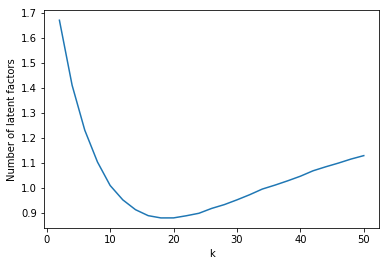

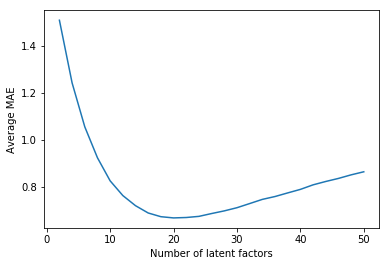

min avg mae is 0.6688588226480088
min avg rmse is 0.8786212917071612
k 	 avg. rmse
--- 	 -----
18 	 0.8786212917071612
20 	 0.8787092414908863
22 	 0.887196147336582
16 	 0.8876731594408064
24 	 0.8971953464974604
14 	 0.9115356457657462
26 	 0.9165544093922311
28 	 0.9317926229221986
12 	 0.9507681632402051
30 	 0.9508608676646242
32 	 0.9713760083889402
34 	 0.9940803804033385
10 	 1.0083241327693326
36 	 1.0098654826759288
38 	 1.0270270255689535
40 	 1.045410962766153
42 	 1.0671370500214852
44 	 1.0831144264904018
46 	 1.0979468879911223
8 	 1.1024037222205276
48 	 1.1141458164346116
50 	 1.1278118265721873
6 	 1.2295016133641723
4 	 1.4094558496357548
2 	 1.669306003328667
k 	 avg. mae
--- 	 -----
20 	 0.6688588226480088
22 	 0.6705987422304532
18 	 0.6740536535527177
24 	 0.6754430074864637
26 	 0.687460716823203
16 	 0.6898245791997537
28 	 0.6987540194158631
30 	 0.7122483155727138
14 	 0.720856524636262
32 	 0.7298484079415911
34 	 0.7476010208503406
36 	 0.7597832956448581
1

In [179]:
#Question 19---To run
nnmf_train(getPopular,np.arange(2,51,2))


Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 9460
RMSE: 1.1356
MAE:  0.9567
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 9499
RMSE: 1.1434
MAE:  0.9656
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 9494
RMSE: 1.1346
MAE:  0.9586
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 9483
RMSE: 1.1384
MAE:  0.9612
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 9499
RMSE: 1.1433
MAE:  0.9637
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 9478
RMSE: 1.1264
MAE:  0.9519
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 9494
RMSE: 1.1320
MAE:  0.9538
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 9514
RMSE: 1.1432
MAE:  0.9661
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 9439
RMSE: 1.1348
MAE:  0.9607
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 9434
RMSE: 1.1347
MAE:  0.9602
Model with

Size of orginal testset 10084
Size of trimmed testset 9476
RMSE: 0.8707
MAE:  0.6687
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 9506
RMSE: 0.8899
MAE:  0.6811
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 9481
RMSE: 0.9048
MAE:  0.6865
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 9461
RMSE: 0.8867
MAE:  0.6789
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 9491
RMSE: 0.9021
MAE:  0.6860
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 9459
RMSE: 0.8845
MAE:  0.6741
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 9484
RMSE: 0.8854
MAE:  0.6727
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 9505
RMSE: 0.8825
MAE:  0.6715
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 9494
RMSE: 0.9160
MAE:  0.6921
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 9483
RMSE: 0.9008
MAE:  0.6863
----Pair 4
Size of o

Size of orginal testset 10083
Size of trimmed testset 9526
RMSE: 0.9234
MAE:  0.6940
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 9507
RMSE: 0.9030
MAE:  0.6821
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 9471
RMSE: 0.9358
MAE:  0.7029
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 9473
RMSE: 0.9172
MAE:  0.6894
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 9417
RMSE: 0.9359
MAE:  0.7043
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 9462
RMSE: 0.9239
MAE:  0.6975
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 9499
RMSE: 0.9155
MAE:  0.6908
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 9468
RMSE: 0.9331
MAE:  0.7022
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 9518
RMSE: 0.9225
MAE:  0.6986
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 9489
RMSE: 0.9240
MAE:  0.6983
----Pair 7
Size of o

Size of orginal testset 10083
Size of trimmed testset 9500
RMSE: 0.9583
MAE:  0.7193
min value of avg rmse= 0.8914511544347252
min value of avg MAE= 0.6791416555923774


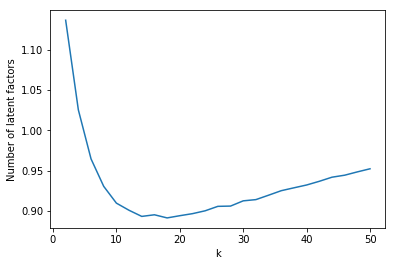

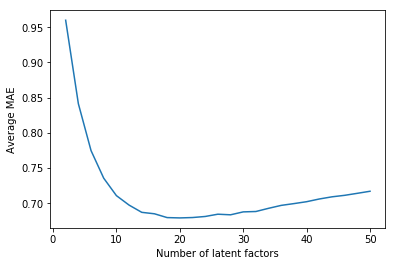

min avg mae is 0.6791416555923774
min avg rmse is 0.8914511544347252
k 	 avg. rmse
--- 	 -----
18 	 0.8914511544347252
14 	 0.8933250603281907
20 	 0.8941982202900215
16 	 0.8953366076501394
22 	 0.8967346366883053
24 	 0.9002886193675609
12 	 0.9008964680610678
26 	 0.9057976823306915
28 	 0.9061280770989593
10 	 0.909783599046213
30 	 0.9126220520808539
32 	 0.9141535307426768
34 	 0.9196306292683193
36 	 0.9252264287012617
38 	 0.9287946035342539
8 	 0.9306068559789697
40 	 0.9322896481755087
42 	 0.9368667625235194
44 	 0.9419558911134693
46 	 0.9444399623663398
48 	 0.9485448453704212
50 	 0.9523978327960905
6 	 0.9646770981091539
4 	 1.0254744655344579
2 	 1.1366397124132674
k 	 avg. mae
--- 	 -----
20 	 0.6791416555923774
18 	 0.6796075046326898
22 	 0.679676866240072
24 	 0.6811811160923167
28 	 0.6835558686742945
26 	 0.684413149920605
16 	 0.685006927836221
14 	 0.6870723483490017
30 	 0.6877048790534903
32 	 0.6882489840154223
34 	 0.6927840587921675
36 	 0.696953070873638
1

In [267]:
nnmf_train(getPopular_new,np.arange(2,51,2))

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3172
RMSE: 1.5831
MAE:  1.3799
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3188
RMSE: 1.5388
MAE:  1.3367
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3133
RMSE: 1.5732
MAE:  1.3647
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 3216
RMSE: 1.5683
MAE:  1.3607
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3268
RMSE: 1.5792
MAE:  1.3652
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3259
RMSE: 1.5649
MAE:  1.3604
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 3173
RMSE: 1.5977
MAE:  1.3879
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3220
RMSE: 1.5727
MAE:  1.3574
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3199
RMSE: 1.5927
MAE:  1.3823
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3128
RMSE: 1.5817
MAE:  1.3734
Model with

----Pair 4
Size of orginal testset 10084
Size of trimmed testset 3216
RMSE: 0.9962
MAE:  0.7640
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3219
RMSE: 1.0086
MAE:  0.7773
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3155
RMSE: 0.9882
MAE:  0.7560
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 3166
RMSE: 1.0117
MAE:  0.7756
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3170
RMSE: 0.9825
MAE:  0.7581
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3215
RMSE: 1.0148
MAE:  0.7840
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3167
RMSE: 1.0239
MAE:  0.7912
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3099
RMSE: 0.9843
MAE:  0.7617
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3216
RMSE: 1.0013
MAE:  0.7700
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3118
RMSE: 0.9898
MAE:  0.7676
----Pair 

----Pair 7
Size of orginal testset 10083
Size of trimmed testset 3223
RMSE: 1.0322
MAE:  0.7941
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 3166
RMSE: 1.0498
MAE:  0.8010
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 3217
RMSE: 1.0563
MAE:  0.8194
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3177
RMSE: 1.0586
MAE:  0.8150
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 3266
RMSE: 1.0617
MAE:  0.8086
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 3196
RMSE: 1.0464
MAE:  0.8023
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 3185
RMSE: 1.0792
MAE:  0.8370
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 3135
RMSE: 1.0482
MAE:  0.8040
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 3255
RMSE: 1.0368
MAE:  0.7997
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 3182
RMSE: 1.0581
MAE:  0.8167
----Pair 

----Pair 10
Size of orginal testset 10083
Size of trimmed testset 3188
RMSE: 1.1488
MAE:  0.8901
min value of avg rmse= 1.0026158869948645
min value of avg MAE= 0.7696104602535765


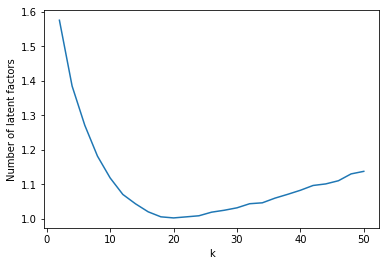

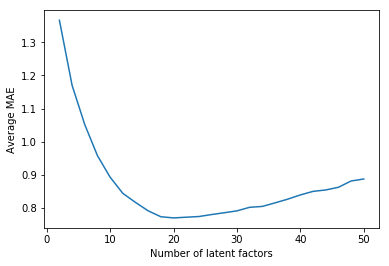

min avg mae is 0.7696104602535765
min avg rmse is 1.0026158869948645
k 	 avg. rmse
--- 	 -----
20 	 1.0026158869948645
22 	 1.0056793798276378
18 	 1.0057746123347866
24 	 1.0088185664496716
26 	 1.0192698999265815
16 	 1.0202692936058153
28 	 1.0248320678013638
30 	 1.0318493923471987
14 	 1.0434522218826119
32 	 1.0437183519177289
34 	 1.0463600744142338
36 	 1.0599503303388655
12 	 1.0706485664453438
38 	 1.0709599021823462
40 	 1.082668587244314
42 	 1.0965811875232103
44 	 1.1011129351237874
46 	 1.110304845727968
10 	 1.1184453362160245
48 	 1.1301156905623309
50 	 1.1375125401711883
8 	 1.1816717954886755
6 	 1.2710319733558249
4 	 1.3846575026794559
2 	 1.575221343568296
k 	 avg. mae
--- 	 -----
20 	 0.7696104602535765
22 	 0.7717563548511295
18 	 0.773141616906244
24 	 0.7738221935762609
26 	 0.7798073482481407
28 	 0.7852437812559008
30 	 0.7909323328361493
16 	 0.7909453825902919
32 	 0.8016666906526595
34 	 0.8043419298068495
36 	 0.8150807343161649
14 	 0.8164495874384856


In [180]:
#Question 20---To run
nnmf_train(getUnpopular,np.arange(2,51,2))

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 609
RMSE: 1.2661
MAE:  0.9688
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 589
RMSE: 1.1913
MAE:  0.9412
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 617
RMSE: 1.2319
MAE:  0.9739
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 580
RMSE: 1.2812
MAE:  1.0068
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 597
RMSE: 1.2333
MAE:  0.9888
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 607
RMSE: 1.1725
MAE:  0.9284
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 624
RMSE: 1.2213
MAE:  0.9722
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 606
RMSE: 1.2114
MAE:  0.9550
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 584
RMSE: 1.1675
MAE:  0.9126
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 629
RMSE: 1.1998
MAE:  0.9477
Model with factor eq

----Pair 5
Size of orginal testset 10084
Size of trimmed testset 635
RMSE: 1.1768
MAE:  0.9035
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 619
RMSE: 1.1900
MAE:  0.9191
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 594
RMSE: 1.1903
MAE:  0.9274
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 618
RMSE: 1.2170
MAE:  0.9578
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 574
RMSE: 1.1885
MAE:  0.9253
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 606
RMSE: 1.1637
MAE:  0.9194
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 644
RMSE: 1.1749
MAE:  0.9165
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 604
RMSE: 1.1653
MAE:  0.9199
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 594
RMSE: 1.2559
MAE:  0.9730
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 609
RMSE: 1.1415
MAE:  0.8928
----Pair 5
Size of 

----Pair 9
Size of orginal testset 10083
Size of trimmed testset 617
RMSE: 1.2020
MAE:  0.9338
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 590
RMSE: 1.2044
MAE:  0.9426
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 579
RMSE: 1.1181
MAE:  0.8674
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 624
RMSE: 1.1776
MAE:  0.9076
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 594
RMSE: 1.1902
MAE:  0.9255
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 612
RMSE: 1.2003
MAE:  0.9181
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 604
RMSE: 1.2364
MAE:  0.9736
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 611
RMSE: 1.1910
MAE:  0.9391
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 605
RMSE: 1.1548
MAE:  0.8997
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 623
RMSE: 1.1166
MAE:  0.8726
----Pair 9
Size of 

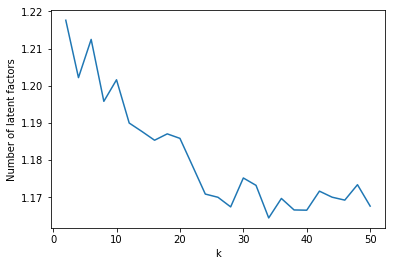

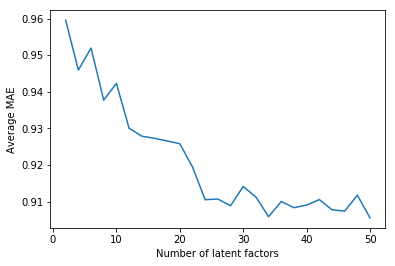

min avg mae is 0.9055219822798865
min avg rmse is 1.164453750000627
k 	 avg. rmse
--- 	 -----
34 	 1.164453750000627
40 	 1.1665311627802661
38 	 1.1665970292659404
28 	 1.1674214613291238
50 	 1.1676276385066564
46 	 1.1692409934029826
36 	 1.1696887849552893
26 	 1.170005337997316
44 	 1.1700294103227482
24 	 1.1708708514316322
42 	 1.1716545656117998
32 	 1.1732151272225042
48 	 1.1733856801366793
30 	 1.1751978405481283
22 	 1.1783891197934449
16 	 1.185352309996287
20 	 1.1858550413450173
18 	 1.1870647030352242
14 	 1.1877160622065752
12 	 1.1899789771243965
8 	 1.1958170637034162
10 	 1.2016150225391782
4 	 1.2021964834251473
6 	 1.2124740149482975
2 	 1.2176324321275847
k 	 avg. mae
--- 	 -----
50 	 0.9055219822798865
34 	 0.9058680081232
46 	 0.9073619556080924
44 	 0.9077519878385095
38 	 0.9083146055234235
28 	 0.9088509180445875
40 	 0.9090226975252401
36 	 0.9100093688308256
24 	 0.9104957934026064
42 	 0.9105290390331549
26 	 0.9106864550053781
32 	 0.9112346707915775
48 

In [268]:
nnmf_train(getUnpopular_new,np.arange(2,51,2))

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 70
RMSE: 1.8541
MAE:  1.6825
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 36
RMSE: 1.8296
MAE:  1.6141
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 102
RMSE: 1.7317
MAE:  1.5588
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 32
RMSE: 1.9013
MAE:  1.6532
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 53
RMSE: 1.8612
MAE:  1.6674
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 40
RMSE: 1.6896
MAE:  1.4347
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 85
RMSE: 1.7213
MAE:  1.5398
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 74
RMSE: 1.8395
MAE:  1.6754
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 51
RMSE: 1.9306
MAE:  1.7844
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 48
RMSE: 1.9018
MAE:  1.7069
Model with factor equal to 4


Size of orginal testset 10084
Size of trimmed testset 57
RMSE: 1.5013
MAE:  1.2031
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 40
RMSE: 1.3040
MAE:  0.9823
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 56
RMSE: 1.4357
MAE:  1.0626
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 28
RMSE: 1.3942
MAE:  1.1537
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 69
RMSE: 1.4730
MAE:  1.1932
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 42
RMSE: 1.4588
MAE:  1.0993
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 77
RMSE: 1.3879
MAE:  1.0819
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 53
RMSE: 1.4538
MAE:  1.1961
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 54
RMSE: 1.4608
MAE:  1.1167
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 31
RMSE: 1.3701
MAE:  1.1022
----Pair 6
Size of orginal testset 10084

Size of orginal testset 10084
Size of trimmed testset 55
RMSE: 1.4653
MAE:  1.1113
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 99
RMSE: 1.5260
MAE:  1.1177
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 75
RMSE: 1.4741
MAE:  1.0867
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 38
RMSE: 1.5914
MAE:  1.0780
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 62
RMSE: 1.4707
MAE:  1.1253
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 56
RMSE: 1.5945
MAE:  1.1664
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 43
RMSE: 1.6580
MAE:  1.1258
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 93
RMSE: 1.6731
MAE:  1.2090
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 22
RMSE: 1.7103
MAE:  1.3430
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 19
RMSE: 1.2078
MAE:  0.9500
Model with factor equal to 38
----Pair 1
Size of orginal testset 10084

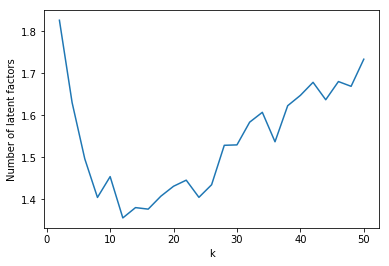

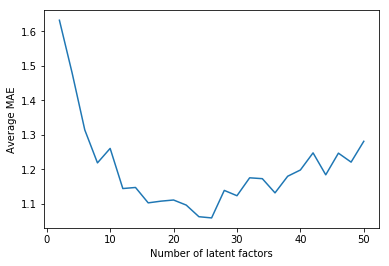

min avg mae is 1.0587011259365338
min avg rmse is 1.356053722364982
k 	 avg. rmse
--- 	 -----
12 	 1.356053722364982
16 	 1.3769395114427296
14 	 1.380580214325742
8 	 1.4047474820264307
24 	 1.40497902845018
18 	 1.4076992888046118
20 	 1.4313604631668553
26 	 1.4349105517885505
22 	 1.4458098489317714
10 	 1.4542727120071892
6 	 1.4965269940193386
28 	 1.5287173419809625
30 	 1.5296927769229636
36 	 1.5371198020978443
32 	 1.5836692422522711
34 	 1.6071433017187213
38 	 1.6228563305467028
4 	 1.6303299647443286
44 	 1.6370602778304435
40 	 1.6474119851854987
48 	 1.6689510017337477
42 	 1.6784783312405338
46 	 1.6803086527786508
50 	 1.7334272704981264
2 	 1.8260779737235695
k 	 avg. mae
--- 	 -----
26 	 1.0587011259365338
24 	 1.0621931759071601
22 	 1.0958825489523956
16 	 1.1023390808290847
18 	 1.1072617667468916
20 	 1.1106150014368306
30 	 1.1230308680100545
36 	 1.1313256905948819
28 	 1.138443190074306
12 	 1.1438418809585895
14 	 1.1469762670984098
34 	 1.1724752415287887
32

In [181]:
#Question 21---To run
nnmf_train(getHighVariance,np.arange(2,51,2))

Model with factor equal to 2
----Pair 1
['74532', '74946', '86377', '7155', '6686', '3404', '2381', '1866', '1014', '179819', '71520', '85', '2382', '5909', '5048', '85367', '179819', '74532', '86320', '3525', '120635', '85', '5480', '3404', '74946']
Size of orginal testset 10084
Size of trimmed testset 25
RMSE: 1.8315
MAE:  1.6444
----Pair 2
['85', '1483', '85367', '1866', '74946', '130634', '120635', '130634', '7155', '2382', '4821', '166534', '4821', '3404', '179819', '74946', '3404', '4821', '27822', '86347']
Size of orginal testset 10084
Size of trimmed testset 20
RMSE: 1.8918
MAE:  1.6463
----Pair 3
['27822', '7669', '86347', '1866', '86377', '74532', '68073', '85367', '71520', '213', '255', '120635', '71520', '130634', '1483', '166534', '5909', '54648', '85', '619', '8372', '2381', '3099']
Size of orginal testset 10084
Size of trimmed testset 23
RMSE: 1.9573
MAE:  1.7462
----Pair 4
['619', '5909', '86347', '71520', '5909', '1468', '1468', '110127', '4248', '3404', '54648', '8637

['85367', '3404', '166534', '4248', '2381', '2381', '4821', '1014', '3404', '86347', '2381', '54648', '1483', '179819', '3525', '213', '130634', '179819', '102', '130634', '1034', '1483', '619', '1014', '86377', '1468', '71520', '255']
Size of orginal testset 10083
Size of trimmed testset 28
RMSE: 1.9132
MAE:  1.5344
----Pair 9
['68073', '1866', '3594', '4248', '5909', '5480', '85', '1468', '6686', '86320', '86320', '85367', '85367', '74946', '7669', '1866', '5909', '120635', '1483', '1866', '2381', '179819']
Size of orginal testset 10083
Size of trimmed testset 22
RMSE: 1.9591
MAE:  1.7020
----Pair 10
['86377', '74532', '110127', '86347', '6686', '68073', '102', '3525', '85', '5048', '255', '255', '5480', '27822', '213', '1034', '85', '85367', '85', '7669', '179819', '86347', '85', '85367', '74946', '85', '5480', '619']
Size of orginal testset 10083
Size of trimmed testset 28
RMSE: 1.6006
MAE:  1.3678
Model with factor equal to 8
----Pair 1
['71520', '120635', '213', '255', '8372', '1

['1866', '8372', '71520', '179819', '54648', '4821', '5480', '86347', '213', '120635', '1468', '3594', '3594', '85367', '7155', '4248', '179819', '5909', '74946', '85367', '5909', '68073', '4821', '85']
Size of orginal testset 10084
Size of trimmed testset 24
RMSE: 2.0557
MAE:  1.6796
----Pair 6
['86377', '71520', '213', '7669', '85', '3525', '71520', '110127', '86347', '102', '74946', '3525', '255', '1468', '4248', '5480', '110127', '255', '3099', '179819', '8372', '7669', '86347', '2382', '7669', '7669', '68073', '3594']
Size of orginal testset 10084
Size of trimmed testset 28
RMSE: 1.6602
MAE:  1.2866
----Pair 7
['2381', '2382', '3099', '7155', '1483', '85367', '85', '68073', '3525', '85367', '74532', '74946', '86320', '4248', '255', '102', '166534', '4821', '86377', '3099', '5048', '8372', '86320']
Size of orginal testset 10083
Size of trimmed testset 23
RMSE: 1.5173
MAE:  1.1681
----Pair 8
['1483', '1483', '5909', '5480', '68073', '179819', '74532', '7155', '1866', '1034', '86347'

['85', '2381', '74946', '86347', '3404', '1483', '86377', '71520', '166534', '74946', '110127', '1483', '74532', '68073', '7155', '255', '3525', '71520', '130634', '3404', '86347', '1483', '1866', '130634', '4248', '1468']
Size of orginal testset 10084
Size of trimmed testset 26
RMSE: 1.8885
MAE:  1.5512
----Pair 3
['3404', '179819', '1034', '74532', '110127', '1014', '213', '2382', '619', '86347', '74532', '7669', '71520', '102', '179819', '5909', '1034', '166534', '7155', '3404', '86320', '7155', '7155', '1483', '8372', '4248', '3594', '120635', '5048', '166534', '3404', '1034', '85367', '85367']
Size of orginal testset 10084
Size of trimmed testset 34
RMSE: 1.7893
MAE:  1.3918
----Pair 4
['1014', '120635', '2382', '74946', '71520', '5909', '54648', '71520', '2381', '179819', '68073', '74946', '7155', '6686', '1468', '7669', '1866', '213', '5480', '1866', '86377', '3099', '619']
Size of orginal testset 10084
Size of trimmed testset 23
RMSE: 1.7425
MAE:  1.4165
----Pair 5
['5048', '11

['2381', '619', '1866', '2382', '74946', '1866', '130634', '8372', '86347', '2381', '3404', '1866', '1468', '1014', '3404', '3594', '7669', '86377', '1866', '1483', '85', '5048', '166534', '1483', '86347', '255', '7155', '3099', '4248', '74532', '3404']
Size of orginal testset 10083
Size of trimmed testset 31
RMSE: 1.7422
MAE:  1.4575
----Pair 10
['619', '120635', '102', '619', '7669', '7155', '255', '1468', '5048', '74946', '3404', '5480', '86347', '1483', '3099', '1483', '85367', '2382', '2381', '5909', '102', '5048']
Size of orginal testset 10083
Size of trimmed testset 22
RMSE: 1.9481
MAE:  1.5714
Model with factor equal to 24
----Pair 1
['86377', '179819', '71520', '86377', '54648', '619', '213', '86377', '1483', '54648', '110127', '1034', '85367', '2382', '213', '1034', '3594', '5480', '619', '7155', '27822', '7155', '3099', '1483']
Size of orginal testset 10084
Size of trimmed testset 24
RMSE: 1.2823
MAE:  1.0445
----Pair 2
['5048', '6686', '1014', '74532', '54648', '166534', '7

----Pair 6
['1034', '86347', '6686', '1866', '2382', '1483', '166534', '3525', '1014', '6686', '179819', '8372', '5480', '179819', '85367']
Size of orginal testset 10084
Size of trimmed testset 15
RMSE: 2.0262
MAE:  1.6968
----Pair 7
['86377', '166534', '7669', '4821', '5909', '213', '1483', '4821', '54648', '27822', '71520', '179819', '1014', '255', '130634', '74532', '179819', '3525', '102', '4248', '7155', '7155', '54648', '7155', '7155', '27822', '110127', '68073']
Size of orginal testset 10083
Size of trimmed testset 28
RMSE: 1.7183
MAE:  1.4002
----Pair 8
['85', '1483', '213', '619', '110127', '5048', '86347', '85367', '2381', '3099', '255', '68073', '4821', '255', '7669', '6686', '5048', '619', '3404', '3594', '2381', '86320', '86347', '130634', '5909', '86320']
Size of orginal testset 10083
Size of trimmed testset 26
RMSE: 2.0287
MAE:  1.4941
----Pair 9
['255', '3099', '85', '27822', '74946', '3594', '8372', '110127', '4821', '1034', '179819', '7669', '3525', '5048', '1866', '7

['71520', '86377', '27822', '1866', '86347', '8372', '3594', '7669', '1014', '179819', '86320', '86320', '85367', '7155', '86320', '6686', '3525', '85', '54648', '74532', '179819', '1866', '3594', '8372', '1483']
Size of orginal testset 10084
Size of trimmed testset 25
RMSE: 1.3498
MAE:  1.0493
----Pair 4
['6686', '120635', '619', '85', '1866', '5048', '7155', '1034', '3594', '3525', '4821', '110127', '619', '3594', '5048', '110127', '255', '7669', '1483', '5480', '2381', '1468', '179819', '1014']
Size of orginal testset 10084
Size of trimmed testset 24
RMSE: 1.6193
MAE:  1.4104
----Pair 5
['2382', '27822', '7155', '68073', '74946', '102', '4248', '54648', '102', '2382', '7669', '85367', '7669', '7155', '4821', '255', '120635', '7155', '3525', '5480', '179819', '3525', '166534', '213']
Size of orginal testset 10084
Size of trimmed testset 24
RMSE: 1.5830
MAE:  1.2179
----Pair 6
['5909', '166534', '71520', '85', '1468', '7669', '619', '2382', '86377', '1866', '1483', '5480', '3404', '74

['86347', '4821', '86347', '166534', '86347', '7669', '3594', '86377', '4821', '6686', '1014', '54648', '86320', '1483', '1034', '85367', '1866', '130634', '179819', '6686', '2382', '102', '85', '7155', '213', '68073', '110127', '85', '3594', '130634']
Size of orginal testset 10083
Size of trimmed testset 30
RMSE: 2.0071
MAE:  1.5896
Model with factor equal to 40
----Pair 1
['102', '71520', '71520', '7155', '74946', '7155', '2382', '2381', '74532', '85', '1014', '74946', '4821', '3099', '1483', '8372', '86347', '3404', '54648', '1483', '54648', '7155', '213', '1014', '1034', '120635', '6686', '8372', '7669', '2381', '3525', '1468', '130634', '5480', '120635']
Size of orginal testset 10084
Size of trimmed testset 35
RMSE: 1.5715
MAE:  1.2610
----Pair 2
['1483', '5048', '5480', '86320', '7669', '85367', '86377', '7669', '3404', '255', '102', '27822', '1483', '166534', '619', '1468', '4248', '3404', '68073', '255', '1483', '2381', '120635', '3404', '86377', '86320', '74532', '5480', '4821

['4821', '3594', '3525', '85367', '74946', '71520', '4821', '120635', '619', '7669', '86347', '110127', '7155', '8372', '1468', '3525', '71520', '85', '120635', '2381', '255', '166534', '5480', '1014', '85367', '1866', '1034', '7155']
Size of orginal testset 10083
Size of trimmed testset 28
RMSE: 1.4981
MAE:  1.2859
----Pair 8
['86320', '3099', '74946', '1483', '74946', '3594', '3404', '86377', '86320', '130634', '86320', '255', '166534', '6686', '179819', '4821', '7155', '130634', '102', '86320']
Size of orginal testset 10083
Size of trimmed testset 20
RMSE: 1.9382
MAE:  1.4791
----Pair 9
['179819', '179819', '74946', '86347', '71520', '3594', '5048', '2381', '85', '2382', '120635', '7155', '1483', '85367', '130634', '213', '166534', '2381', '1866', '213', '1483']
Size of orginal testset 10083
Size of trimmed testset 21
RMSE: 1.6951
MAE:  1.3481
----Pair 10
['1014', '7155', '213', '7155', '1034', '3099', '74532', '86347', '85', '166534', '86347', '74532', '85', '1866', '54648', '4248'

['85367', '102', '27822', '3525', '619', '68073', '7155', '1483', '1483', '4821', '27822', '120635', '86320', '74532', '86347', '3594', '2381', '3099', '2381']
Size of orginal testset 10084
Size of trimmed testset 19
RMSE: 1.4397
MAE:  1.2163
----Pair 6
['86347', '1034', '179819', '54648', '1483', '86320', '5048', '8372', '3594', '3099', '1866', '619', '85', '4248', '68073', '255', '213', '2381', '5048', '71520', '4821', '86320']
Size of orginal testset 10084
Size of trimmed testset 22
RMSE: 1.7156
MAE:  1.3753
----Pair 7
['7155', '1866', '5048', '1483', '6686', '3594', '130634', '7669', '102', '8372', '1866', '5480', '166534', '3099', '74946', '2381', '102', '4248', '255', '1866', '7669', '1034', '7155', '86347', '74532', '7155', '1014', '2382']
Size of orginal testset 10083
Size of trimmed testset 28
RMSE: 1.6757
MAE:  1.3483
----Pair 8
['1468', '74946', '27822', '2381', '3594', '3594', '120635', '7155', '85', '68073', '3099', '1483', '2382', '102', '1866', '3525', '85367', '85367']


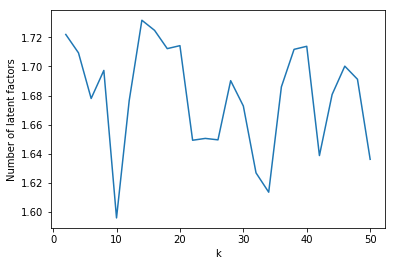

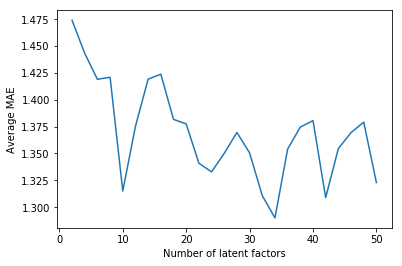

min avg mae is 1.2900465180384284
min avg rmse is 1.5958092987785055
k 	 avg. rmse
--- 	 -----
10 	 1.5958092987785055
34 	 1.613500101425987
32 	 1.6267973978138515
50 	 1.6361280071193818
42 	 1.6387006556184684
22 	 1.6492349036545626
26 	 1.6495114411259801
24 	 1.6505037190499579
30 	 1.6727987604372045
12 	 1.6765221454905315
6 	 1.677971855393158
44 	 1.680697638643463
36 	 1.6859491864490799
28 	 1.6902271743612274
48 	 1.691193521330226
8 	 1.6972736855650286
46 	 1.7001977909068628
4 	 1.7093584038313878
38 	 1.7117676755553828
18 	 1.712260476228932
40 	 1.7138673559459563
20 	 1.7143103768930412
2 	 1.722003244811494
16 	 1.7248325245998735
14 	 1.7317909289995206
k 	 avg. mae
--- 	 -----
34 	 1.2900465180384284
42 	 1.3089665618377233
32 	 1.3107754288507132
10 	 1.3150736015842228
50 	 1.3229249024944543
24 	 1.332871779977849
22 	 1.34094109757948
26 	 1.3501315399234988
30 	 1.3505454034237647
36 	 1.354086442910911
44 	 1.3546044398413102
46 	 1.3694416871425106
28 	 1

In [269]:
nnmf_train(getHighVariance_new,np.arange(2,51,2))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Plotting the ROC curve for threshold2.5
auc is =  0.7816698892307723


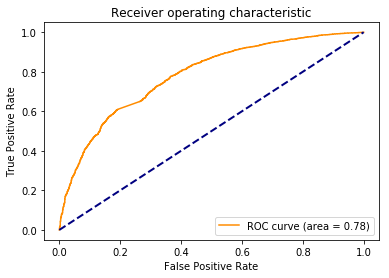

Plotting the ROC curve for threshold3
auc is =  0.7758485119243483


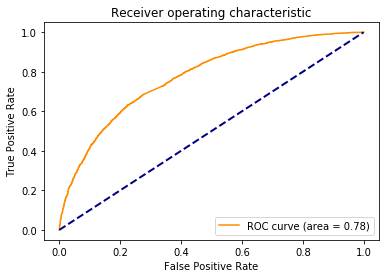

Plotting the ROC curve for threshold3.5
auc is =  0.7678992095436924


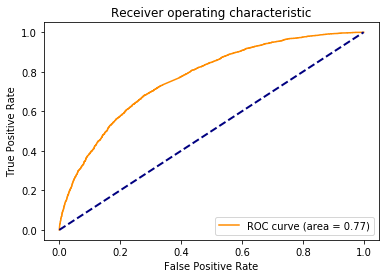

Plotting the ROC curve for threshold4
auc is =  0.759246871465351


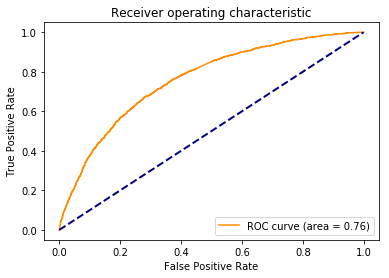

In [68]:
#Question 22
import random

raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]
data.raw_ratings = A_raw_ratings
trainset = data.build_full_trainset()
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B

q16_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=min_k_q18,biased =False)
q10_algo.fit(trainset)
predictions = q10_algo.test(testset)
thresholds = [2.5, 3, 3.5, 4]
y_true_test =[] 
y_pred_test =[] 
for x  in testset:
    y_true_test.append(x[2])
for x  in predictions:
    y_pred_test.append(x.est)
plot_roc_curves(thresholds,y_true_test,y_pred_test)

In [201]:
#Question 23
q23_algo = prediction_algorithms.matrix_factorization.NMF(n_factors=20,biased =False)
trainset = data.build_full_trainset()
print(trainset.n_items)
print(trainset.n_users)
q23_algo.fit(trainset)
items_V = q23_algo.qi.T
users_U = q23_algo.pu
print(items_V.shape)
print(users_U.shape)

print(np.unique(items_V))

def print_top10moviesgenre(coloumn_no):
    column1 = items_V[:,coloumn_no]
    sorted_indices_column1 = np.argsort(column1)[::-1]
    top10_sorted_indices= sorted_indices_column1[0:10]
    print(top10_sorted_indices)

    top10movieids = top10_sorted_indices+1
    movies_df = pd.read_csv('movies.csv')
    #top10movies = movies_df.loc[movies_df['movieId'] == top10movieids]
    top10movies = movies_df[movies_df['movieId'].isin(top10movieids)]
    top10moviesgenres = top10movies['genres']
    print(top10moviesgenres)
    
    



9724
610
(20, 9724)
(610, 20)
[7.18480322e-09 8.72864306e-09 6.80481840e-08 ... 2.63150744e+00
 2.73933409e+00 2.84886561e+00]


In [206]:
mf=pd.read_csv('movies.csv')

algo=prediction_algorithms.matrix_factorization.NMF(n_factors=20)
trainset=data.build_full_trainset()
algo.fit(trainset)
genre=[]
movies=mf.movieId
movies=np.unique(movies)
for k in range(1,20):
    print ("k :",k)
    genre=[]
    sortedList = sorted(zip(algo.qi.T[:,k],movies),reverse=True)
    list10=map(lambda x:x[1],sortedList[:10])
    for i in list10:
        genre.append(mf[mf.movieId==i]['genres'])
    print (genre)


k : 1
[16    Drama|Romance
Name: genres, dtype: object, 2    Comedy|Romance
Name: genres, dtype: object, 11    Comedy|Horror
Name: genres, dtype: object, 0    Adventure|Animation|Children|Comedy|Fantasy
Name: genres, dtype: object, 5    Action|Crime|Thriller
Name: genres, dtype: object, 15    Crime|Drama
Name: genres, dtype: object, 19    Action|Comedy|Crime|Drama|Thriller
Name: genres, dtype: object, 1    Adventure|Children|Fantasy
Name: genres, dtype: object, 8    Action
Name: genres, dtype: object, 7    Adventure|Children
Name: genres, dtype: object]
k : 2
[2    Comedy|Romance
Name: genres, dtype: object, 3    Comedy|Drama|Romance
Name: genres, dtype: object, 13    Drama
Name: genres, dtype: object, 14    Action|Adventure|Romance
Name: genres, dtype: object, 16    Drama|Romance
Name: genres, dtype: object, 0    Adventure|Animation|Children|Comedy|Fantasy
Name: genres, dtype: object, 17    Comedy
Name: genres, dtype: object, 4    Comedy
Name: genres, dtype: object, 6    Comedy|Romanc

In [202]:
print_top10moviesgenre(0)
print_top10moviesgenre(1)
print_top10moviesgenre(2)

[12  8 17  6  5  1  3 18 10 14]
1       Adventure|Children|Fantasy
3             Comedy|Drama|Romance
5            Action|Crime|Thriller
6                   Comedy|Romance
8                           Action
10            Comedy|Drama|Romance
12    Adventure|Animation|Children
14        Action|Adventure|Romance
17                          Comedy
18                          Comedy
Name: genres, dtype: object
[13  8  4  7  2 18 12 10 14 17]
2                   Comedy|Romance
4                           Comedy
7               Adventure|Children
8                           Action
10            Comedy|Drama|Romance
12    Adventure|Animation|Children
13                           Drama
14        Action|Adventure|Romance
17                          Comedy
18                          Comedy
Name: genres, dtype: object
[17 13  9  1 19  5  8 10  2 12]
1             Adventure|Children|Fantasy
2                         Comedy|Romance
5                  Action|Crime|Thriller
8                        

In [207]:
for i in range(0,20):
 print('-----------------')
 print_top10moviesgenre(i)
 print('----------------')

-----------------
[12  8 17  6  5  1  3 18 10 14]
1       Adventure|Children|Fantasy
3             Comedy|Drama|Romance
5            Action|Crime|Thriller
6                   Comedy|Romance
8                           Action
10            Comedy|Drama|Romance
12    Adventure|Animation|Children
14        Action|Adventure|Romance
17                          Comedy
18                          Comedy
Name: genres, dtype: object
----------------
-----------------
[13  8  4  7  2 18 12 10 14 17]
2                   Comedy|Romance
4                           Comedy
7               Adventure|Children
8                           Action
10            Comedy|Drama|Romance
12    Adventure|Animation|Children
13                           Drama
14        Action|Adventure|Romance
17                          Comedy
18                          Comedy
Name: genres, dtype: object
----------------
-----------------
[17 13  9  1 19  5  8 10  2 12]
1             Adventure|Children|Fantasy
2                  

------------------For k= 2 --------------------
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8800  0.8648  0.8714  0.8386  0.8735  0.8713  0.8731  0.8629  0.8670  0.8706  0.8673  0.0106  
MAE (testset)     0.6727  0.6656  0.6706  0.6491  0.6705  0.6712  0.6691  0.6650  0.6661  0.6657  0.6666  0.0064  
Fit time          1.33    1.29    1.26    1.25    1.24    1.25    1.27    1.24    1.28    1.27    1.27    0.03    
Test time         0.06    0.06    0.06    0.06    0.14    0.06    0.06    0.15    0.07    0.06    0.08    0.03    
------------------For k= 4 --------------------
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8733  0.8659  0.8645  0.8689  0.8597  0.8736  0.8528  0.8678  0.8689  0.8762  0.8672

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8726  0.8580  0.8720  0.8541  0.8816  0.8634  0.8596  0.8574  0.8705  0.8711  0.8661  0.0083  
MAE (testset)     0.6685  0.6568  0.6676  0.6574  0.6778  0.6629  0.6645  0.6567  0.6708  0.6699  0.6653  0.0066  
Fit time          3.63    3.76    3.43    3.48    3.68    3.84    5.23    3.24    4.22    2.96    3.75    0.59    
Test time         0.17    0.09    0.11    0.10    0.10    0.20    0.09    0.09    0.19    0.08    0.12    0.05    
------------------For k= 28 --------------------
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8583  0.8605  0.8707  0.8634  0.8634  0.8688  0.8722  0.8572  0.8653  0.8612  0.8641  0.0048  
MAE (testset)     0.6587  0.6599  0.

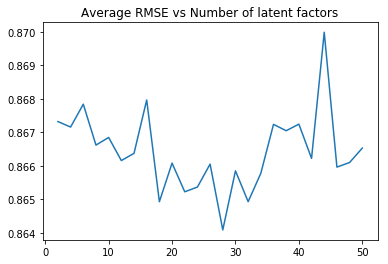

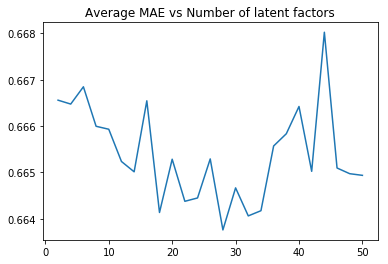

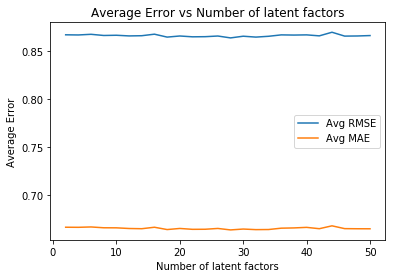

In [75]:
#Question 24---
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate, KFold, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score 

# Define the format
reader = Reader(line_format="user item rating timestamp", sep=',',skip_lines=1)
# Load the data from the file using the reader format
data = Dataset.load_from_file('ml-latest-small/ml-latest-small/ratings.csv', reader=reader)

meanRMSE = []
meanMAE = []

for k in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = k, random_state = 37)
    ans=cross_validate(algo, data, cv=10, verbose=True)
    meanRMSE.append(np.mean(ans.get('test_rmse')))
    meanMAE.append(np.mean(ans.get('test_mae')))
    
kvals = np.arange(2, 51, 2)
plt.plot(kvals, meanRMSE)
plt.title("Average RMSE vs Number of latent factors")
plt.show()

plt.plot(kvals, meanMAE)
plt.title("Average MAE vs Number of latent factors")
plt.show()

plt.xlabel("Number of latent factors")
plt.ylabel("Average Error")
plt.title("Average Error vs Number of latent factors")
plt.plot(kvals, meanRMSE)
plt.plot(kvals, meanMAE)
plt.legend(["Avg RMSE", "Avg MAE"])
plt.show()

In [78]:
#Question 25
'''
k1 = np.argsort(np.array(q24_rmse_values))
k2 = np.argsort(np.array(q24_mae_values))
print((factor_values))
print(factor_values[k1])
print(factor_values[k2])
'''

print("minimum average RMSE",np.min(meanRMSE))
print("minimum average MAE",np.min(meanMAE))

#print("Optimal value of k is",k_for_q24)

minimum average RMSE 0.8640836533047122
minimum average MAE 0.6637592211584292


In [80]:
A = np.sort(meanMAE)
idx = np.argsort(meanMAE)
print('\n')
print(np.sort(meanMAE))

for i in range(0,len(meanMAE)):
    print('mae is', A[i])
    print('idx is', idx[i])
    print('k is',factor_values[idx[i]])



[0.66375922 0.66406179 0.66413536 0.66417384 0.66437667 0.66444904
 0.66466646 0.66493694 0.66497252 0.6650132  0.66502377 0.66509554
 0.66523605 0.66528487 0.66529134 0.66557072 0.66583499 0.66593191
 0.66599579 0.66642316 0.66647515 0.66654548 0.66655923 0.66684793
 0.6680253 ]
mae is 0.6637592211584292
idx is 13
k is 28
mae is 0.664061787692862
idx is 15
k is 32
mae is 0.6641353550098751
idx is 8
k is 18
mae is 0.6641738378581237
idx is 16
k is 34
mae is 0.6643766735267662
idx is 10
k is 22
mae is 0.6644490375802754
idx is 11
k is 24
mae is 0.6646664580196369
idx is 14
k is 30
mae is 0.6649369353899413
idx is 24
k is 50
mae is 0.6649725193463922
idx is 23
k is 48
mae is 0.6650131979129754
idx is 6
k is 14
mae is 0.6650237671316303
idx is 20
k is 42
mae is 0.6650955405663892
idx is 22
k is 46
mae is 0.6652360547932783
idx is 5
k is 12
mae is 0.665284874952964
idx is 9
k is 20
mae is 0.6652913397295015
idx is 12
k is 26
mae is 0.6655707207969016
idx is 17
k is 36
mae is 0.6658349909

In [81]:
A = np.sort(meanRMSE)
idx = np.argsort(meanRMSE)
print('\n')
print(np.sort(meanRMSE))

for i in range(0,len(meanRMSE)):
    print('rmse is', A[i])
    print('idx is', idx[i])
    print('k is',factor_values[idx[i]])



[0.86408365 0.86492705 0.86492791 0.86522322 0.86536481 0.86577649
 0.86584951 0.86596111 0.86605111 0.86608021 0.86609915 0.86615676
 0.86622179 0.86637199 0.86652894 0.86661938 0.86684699 0.86704867
 0.86715822 0.86723835 0.86724523 0.86732242 0.86784109 0.8679674
 0.86999204]
rmse is 0.8640836533047122
idx is 13
k is 28
rmse is 0.8649270537191873
idx is 8
k is 18
rmse is 0.8649279105308793
idx is 15
k is 32
rmse is 0.8652232184748028
idx is 10
k is 22
rmse is 0.8653648130101578
idx is 11
k is 24
rmse is 0.8657764941093665
idx is 16
k is 34
rmse is 0.8658495122703942
idx is 14
k is 30
rmse is 0.8659611079131846
idx is 22
k is 46
rmse is 0.8660511104865959
idx is 12
k is 26
rmse is 0.8660802071569339
idx is 9
k is 20
rmse is 0.866099145528708
idx is 23
k is 48
rmse is 0.8661567644403627
idx is 5
k is 12
rmse is 0.8662217887146495
idx is 20
k is 42
rmse is 0.8663719907274441
idx is 6
k is 14
rmse is 0.866528935163543
idx is 24
k is 50
rmse is 0.8666193760742612
idx is 3
k is 8
rmse i

In [208]:
#to run
k_for_q24 = 18

In [ ]:
from surprise import SVD
def svd_train(trimmer,factor_values):
    nnmf_rmse_values = []
    nnmf_mae_values = []
    #factor_values = np.arange(2,101,2)
    for factor_temp in factor_values:
        print("Model with factor equal to " + str(factor_temp))
        kf = KFold(n_splits=10)
        q16_algo = SVD(n_factors=factor_temp)
        rmse_values_temp = []
        mae_values_temp = []
        pair_no = 1
        for trainset, testset in kf.split(data):
            print("----Pair " + str(pair_no))
            pair_no = pair_no + 1
            q16_algo.fit(trainset)
            trimmed_testset = trimmer(testset)
            print("Size of orginal testset " + str(len(testset)))
            print("Size of trimmed testset " + str(len(trimmed_testset)))
            predictions = q16_algo.test(trimmed_testset)
            rmse_values_temp.append(accuracy.rmse(predictions))
            mae_values_temp.append(accuracy.mae(predictions))
        nnmf_rmse_values.append(np.average(rmse_values_temp))
        nnmf_mae_values.append(np.average(mae_values_temp))
    print('min value of avg rmse=', np.min(nnmf_rmse_values))
    print('min value of avg MAE=', np.min(nnmf_mae_values))
    plt.plot(factor_values,nnmf_rmse_values)
    plt.xlabel('Number of latent factors')
    plt.ylabel('Average MSE')
    plt.show()
    plt.plot(factor_values,nnmf_mae_values)
    plt.xlabel('Number of latent factors')
    plt.ylabel('Average MAE')
    plt.show()
 

Plotting the ROC curve for threshold2.5
auc is =  0.7807930764785072


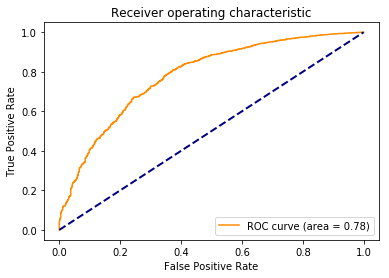

Plotting the ROC curve for threshold3
auc is =  0.7820978038583458


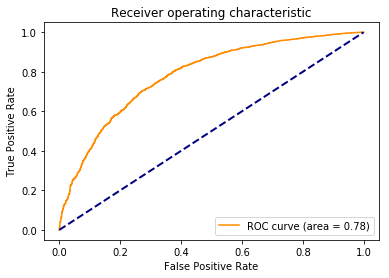

Plotting the ROC curve for threshold3.5
auc is =  0.7915739393985068


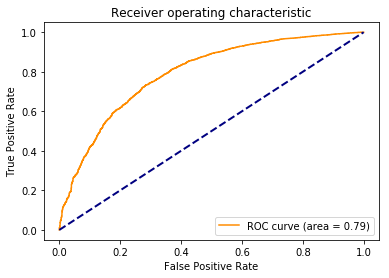

Plotting the ROC curve for threshold4
auc is =  0.7849628768620788


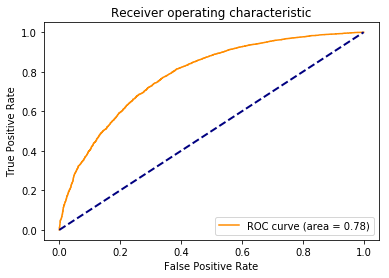

In [209]:
#Question 29

#to run
import random
from surprise import Reader, Dataset, SVD, accuracy
raw_ratings = data.raw_ratings

# shuffle ratings if you want
random.shuffle(raw_ratings)

# A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]
data.raw_ratings = A_raw_ratings
trainset = data.build_full_trainset()
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B

q24_algo = SVD(n_factors=k_for_q24)
q24_algo.fit(trainset)
predictions = q24_algo.test(testset)
thresholds = [2.5, 3, 3.5, 4]
y_true_test =[] 
y_pred_test =[] 
for x  in testset:
    y_true_test.append(x[2])
for x  in predictions:
    y_pred_test.append(x.est)
plot_roc_curves(thresholds,y_true_test,y_pred_test)

------------------For k= 2 --------------------
RMSE: 0.8567
RMSE: 0.8567
RMSE: 0.8382
RMSE: 0.8489
RMSE: 0.8401
RMSE: 0.8472
RMSE: 0.8575
RMSE: 0.8607
RMSE: 0.8423
RMSE: 0.8491
------------------For k= 4 --------------------
RMSE: 0.8366
RMSE: 0.8388
RMSE: 0.8465
RMSE: 0.8470
RMSE: 0.8576
RMSE: 0.8626
RMSE: 0.8615
RMSE: 0.8586
RMSE: 0.8454
RMSE: 0.8588
------------------For k= 6 --------------------
RMSE: 0.8392
RMSE: 0.8455
RMSE: 0.8657
RMSE: 0.8489
RMSE: 0.8464
RMSE: 0.8562
RMSE: 0.8458
RMSE: 0.8377
RMSE: 0.8562
RMSE: 0.8523
------------------For k= 8 --------------------
RMSE: 0.8461
RMSE: 0.8568
RMSE: 0.8460
RMSE: 0.8668
RMSE: 0.8512
RMSE: 0.8522
RMSE: 0.8399
RMSE: 0.8424
RMSE: 0.8522
RMSE: 0.8458
------------------For k= 10 --------------------
RMSE: 0.8462
RMSE: 0.8369
RMSE: 0.8501
RMSE: 0.8491
RMSE: 0.8551
RMSE: 0.8388
RMSE: 0.8497
RMSE: 0.8442
RMSE: 0.8590
RMSE: 0.8539
------------------For k= 12 --------------------
RMSE: 0.8385
RMSE: 0.8545
RMSE: 0.8476
RMSE: 0.8523
RMSE: 0.

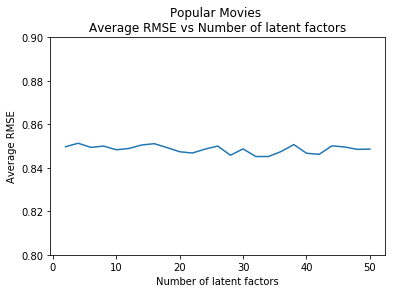

In [162]:
#Question 26
kf = KFold(n_splits=10)

mean_rmse_q26 = []

for k in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = k, random_state = 37)
    rmse = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        newtest = getPopular(testset, 2)
        predictions = algo.test(newtest)
        rmse.append(accuracy.rmse(predictions))
    mean_rmse_q26.append(round(np.mean(rmse),4))

plt.xlabel("Number of latent factors")
plt.ylabel("Average RMSE")
plt.title("Popular Movies \nAverage RMSE vs Number of latent factors")
plt.plot(kvals, mean_rmse_q26)
plt.ylim([0.8,0.9])
plt.show()

------------------For k= 2 --------------------
RMSE: 0.8674
RMSE: 0.8503
RMSE: 0.8688
RMSE: 0.8645
RMSE: 0.8623
RMSE: 0.8728
RMSE: 0.8547
RMSE: 0.8592
RMSE: 0.8501
RMSE: 0.8553
------------------For k= 4 --------------------
RMSE: 0.8601
RMSE: 0.8586
RMSE: 0.8708
RMSE: 0.8572
RMSE: 0.8576
RMSE: 0.8597
RMSE: 0.8545
RMSE: 0.8685
RMSE: 0.8609
RMSE: 0.8518
------------------For k= 6 --------------------
RMSE: 0.8535
RMSE: 0.8488
RMSE: 0.8723
RMSE: 0.8701
RMSE: 0.8575
RMSE: 0.8523
RMSE: 0.8485
RMSE: 0.8529
RMSE: 0.8541
RMSE: 0.8639
------------------For k= 8 --------------------
RMSE: 0.8499
RMSE: 0.8662
RMSE: 0.8548
RMSE: 0.8661
RMSE: 0.8646
RMSE: 0.8579
RMSE: 0.8726
RMSE: 0.8484
RMSE: 0.8561
RMSE: 0.8544
------------------For k= 10 --------------------
RMSE: 0.8704
RMSE: 0.8479
RMSE: 0.8448
RMSE: 0.8569
RMSE: 0.8511
RMSE: 0.8501
RMSE: 0.8548
RMSE: 0.8594
RMSE: 0.8599
RMSE: 0.8742
------------------For k= 12 --------------------
RMSE: 0.8634
RMSE: 0.8585
RMSE: 0.8710
RMSE: 0.8566
RMSE: 0.

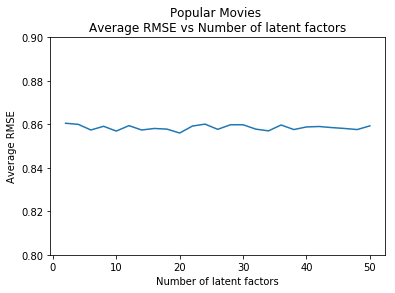

In [270]:
#Question 26---getPopular_new
kf = KFold(n_splits=10)

mean_rmse_q26 = []

for k in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = k, random_state = 37)
    rmse = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        newtest = getPopular_new(testset, 2)
        predictions = algo.test(newtest)
        rmse.append(accuracy.rmse(predictions))
    mean_rmse_q26.append(round(np.mean(rmse),4))

plt.xlabel("Number of latent factors")
plt.ylabel("Average RMSE")
plt.title("Popular Movies \nAverage RMSE vs Number of latent factors")
plt.plot(kvals, mean_rmse_q26)
plt.ylim([0.8,0.9])
plt.show()

------------------For k= 2 --------------------
RMSE: 0.9029
RMSE: 0.8965
RMSE: 0.8959
RMSE: 0.9191
RMSE: 0.9057
RMSE: 0.8943
RMSE: 0.9004
RMSE: 0.8915
RMSE: 0.9067
RMSE: 0.9099
------------------For k= 4 --------------------
RMSE: 0.9080
RMSE: 0.9161
RMSE: 0.9174
RMSE: 0.9135
RMSE: 0.9150
RMSE: 0.8850
RMSE: 0.8902
RMSE: 0.8954
RMSE: 0.8762
RMSE: 0.9169
------------------For k= 6 --------------------
RMSE: 0.8830
RMSE: 0.9186
RMSE: 0.8944
RMSE: 0.8978
RMSE: 0.8908
RMSE: 0.8986
RMSE: 0.9165
RMSE: 0.8969
RMSE: 0.9019
RMSE: 0.9167
------------------For k= 8 --------------------
RMSE: 0.9068
RMSE: 0.9143
RMSE: 0.8935
RMSE: 0.9135
RMSE: 0.8880
RMSE: 0.9072
RMSE: 0.8980
RMSE: 0.8894
RMSE: 0.8975
RMSE: 0.9171
------------------For k= 10 --------------------
RMSE: 0.9187
RMSE: 0.9076
RMSE: 0.9127
RMSE: 0.9038
RMSE: 0.8740
RMSE: 0.8841
RMSE: 0.9128
RMSE: 0.8875
RMSE: 0.8925
RMSE: 0.8945
------------------For k= 12 --------------------
RMSE: 0.9339
RMSE: 0.8836
RMSE: 0.8892
RMSE: 0.8703
RMSE: 0.

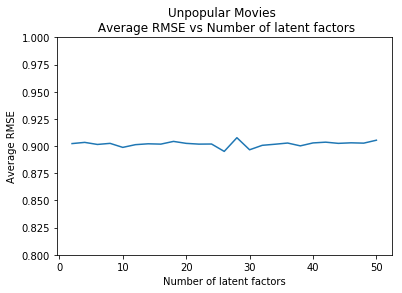

In [165]:
#Question 27
mean_rmse_q27 = []

for k in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = k, random_state = 37)
    rmse = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        newtest = getUnpopular(testset)
        predictions = algo.test(newtest)
        rmse.append(accuracy.rmse(predictions))
    mean_rmse_q27.append(round(np.mean(rmse),4))

plt.xlabel("Number of latent factors")
plt.ylabel("Average RMSE")
plt.title("Unpopular Movies \n Average RMSE vs Number of latent factors")
plt.plot(kvals, mean_rmse_q27)
plt.ylim([0.8,1.0])
plt.show()

------------------For k= 2 --------------------
RMSE: 0.9171
RMSE: 1.0051
RMSE: 0.9794
RMSE: 0.9750
RMSE: 0.9909
RMSE: 0.9867
RMSE: 1.0258
RMSE: 0.9697
RMSE: 0.9654
RMSE: 0.9437
------------------For k= 4 --------------------
RMSE: 0.9922
RMSE: 1.0259
RMSE: 0.9160
RMSE: 0.9378
RMSE: 0.9513
RMSE: 0.9567
RMSE: 1.0403
RMSE: 0.9651
RMSE: 0.9603
RMSE: 0.9869
------------------For k= 6 --------------------
RMSE: 1.0312
RMSE: 0.9961
RMSE: 0.9511
RMSE: 1.0249
RMSE: 0.9456
RMSE: 0.9965
RMSE: 0.9283
RMSE: 0.9704
RMSE: 0.9706
RMSE: 0.9573
------------------For k= 8 --------------------
RMSE: 0.9521
RMSE: 1.0319
RMSE: 0.9981
RMSE: 0.9259
RMSE: 0.9648
RMSE: 1.0038
RMSE: 1.0110
RMSE: 1.0071
RMSE: 0.8942
RMSE: 0.9356
------------------For k= 10 --------------------
RMSE: 1.0048
RMSE: 1.0095
RMSE: 0.9237
RMSE: 0.9689
RMSE: 0.9720
RMSE: 0.9974
RMSE: 0.9388
RMSE: 0.9625
RMSE: 0.9887
RMSE: 0.9623
------------------For k= 12 --------------------
RMSE: 0.9970
RMSE: 0.9920
RMSE: 0.9327
RMSE: 0.9968
RMSE: 1.

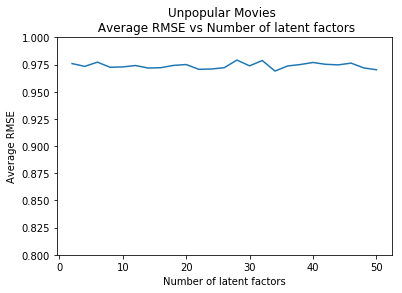

In [271]:
#Question 27
mean_rmse_q27 = []

for k in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = k, random_state = 37)
    rmse = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        newtest = getUnpopular_new(testset)
        predictions = algo.test(newtest)
        rmse.append(accuracy.rmse(predictions))
    mean_rmse_q27.append(round(np.mean(rmse),4))

plt.xlabel("Number of latent factors")
plt.ylabel("Average RMSE")
plt.title("Unpopular Movies \n Average RMSE vs Number of latent factors")
plt.plot(kvals, mean_rmse_q27)
plt.ylim([0.8,1.0])
plt.show()

------------------For k= 2 --------------------
RMSE: 1.3552
RMSE: 1.4089
RMSE: 1.4159
RMSE: 1.3820
RMSE: 1.4924
RMSE: 1.4771
RMSE: 1.4296
RMSE: 1.2669
RMSE: 1.3910
RMSE: 1.4934
------------------For k= 4 --------------------
RMSE: 1.4724
RMSE: 1.3433
RMSE: 1.5462
RMSE: 1.3767
RMSE: 1.4166
RMSE: 1.4192
RMSE: 1.3221
RMSE: 1.4432
RMSE: 1.4070
RMSE: 1.3648
------------------For k= 6 --------------------
RMSE: 1.4095
RMSE: 1.3173
RMSE: 1.3185
RMSE: 1.3830
RMSE: 1.4069
RMSE: 1.3316
RMSE: 1.4288
RMSE: 1.3176
RMSE: 1.3749
RMSE: 1.3052
------------------For k= 8 --------------------
RMSE: 1.4406
RMSE: 1.3069
RMSE: 1.3541
RMSE: 1.5815
RMSE: 1.4438
RMSE: 1.3890
RMSE: 1.4698
RMSE: 1.3338
RMSE: 1.3920
RMSE: 1.4479
------------------For k= 10 --------------------
RMSE: 1.3739
RMSE: 1.3710
RMSE: 1.2908
RMSE: 1.4456
RMSE: 1.3491
RMSE: 1.4494
RMSE: 1.4148
RMSE: 1.4333
RMSE: 1.2290
RMSE: 1.4274
------------------For k= 12 --------------------
RMSE: 1.5040
RMSE: 1.4135
RMSE: 1.3389
RMSE: 1.4995
RMSE: 1.

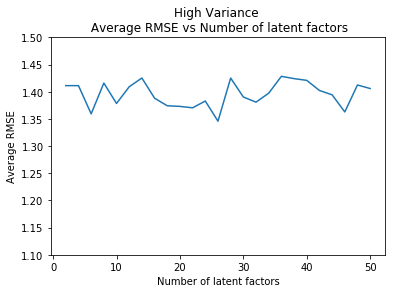

In [167]:
#Question 28
mean_rmse_q28 = []

for i in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = i, random_state = 37)
    rmse = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        newtest = getHighVariance(testset)
        predictions = algo.test(newtest)
        rmse.append(accuracy.rmse(predictions))
    mean_rmse_q28.append(round(np.mean(rmse),4))

plt.xlabel("Number of latent factors")
plt.ylabel("Average RMSE")
plt.title("High Variance \n Average RMSE vs Number of latent factors")
plt.plot(kvals, mean_rmse_q28)
plt.ylim([1.1,1.5])
plt.show()

------------------For k= 50 --------------------
['54648', '179819', '1483', '1014', '86320', '86320', '213', '102', '54648', '179819', '120635', '6686', '255', '255', '5048', '3525', '2381', '255', '7155', '74946', '3404', '1034', '166534', '86377', '110127', '255']
RMSE: 1.3368
['5048', '7669', '6686', '213', '2382', '85367', '7155', '74946', '166534', '54648', '74946', '2381', '130634', '1468', '1034', '5048', '3099', '6686', '179819', '166534', '5909', '3525', '74946', '74946', '4248', '3594', '86347', '1014']
RMSE: 1.6663
['3099', '1483', '1468', '1483', '1483', '86347', '3525', '3404', '179819', '1483', '4248', '619', '7155', '166534', '1866', '7155', '3404', '8372', '2382', '68073', '1866', '2382', '213', '86377', '7669', '1866', '619', '213', '4821', '68073', '74532']
RMSE: 1.5588
['5048', '27822', '3404', '3594', '3099', '179819', '7669', '86377', '74946', '86320', '7155', '7155', '1014', '1866', '85', '85', '179819', '71520']
RMSE: 1.4257
['2382', '7155', '68073', '619', '863

['7669', '86377', '68073', '8372', '2382', '74946', '166534', '120635', '5048', '2382', '68073', '85', '213', '1483', '6686', '1483', '5480', '179819', '85367', '1034', '166534', '86320', '5048']
RMSE: 1.5489
['85', '3099', '71520', '255', '179819', '255', '3099', '1014', '1468', '2382', '74532', '3404', '3099', '255', '86347', '1014', '120635', '120635', '68073', '7669', '3525', '6686', '3525']
RMSE: 1.5828
['74946', '71520', '7155', '3404', '7669', '74946', '1866', '1034', '54648', '5480', '85', '7155', '2382', '1866', '1483', '86320', '85', '5048', '86347', '3594', '1866', '27822', '85367', '1468', '1866', '179819', '85367', '5048', '86377', '4248', '130634']
RMSE: 1.3356
------------------For k= 50 --------------------
['110127', '7155', '1468', '213', '68073', '3594', '1866', '74946', '3594', '4248', '4821', '7155', '5909', '5909', '7155', '130634', '2382', '6686', '1468', '85367', '619', '74946']
RMSE: 1.6104
['120635', '2381', '74946', '3099', '71520', '3525', '74946', '166534',

['6686', '3525', '3099', '7669', '255', '68073', '86347', '4248', '68073', '86347', '255', '1483', '213', '4248', '1483', '619', '5480', '85', '4821', '74532', '86347', '619', '3525', '6686', '3404', '5480', '74946', '1483', '5480', '1866', '255']
RMSE: 1.7003
['54648', '6686', '5480', '71520', '1866', '3099', '6686', '179819', '85367', '619', '5909', '74946', '5048', '110127', '68073', '179819', '74532', '8372', '1483', '68073', '1483', '102', '179819', '86320', '74946', '3594', '54648', '86320', '5480', '4248', '86320', '130634', '71520']
RMSE: 1.3698
['166534', '4821', '130634', '85367', '179819', '120635', '3594', '1866', '2382', '74532', '1468', '110127', '1468', '110127', '3099', '86320', '102', '5909', '3525', '74946', '3099', '7155']
RMSE: 1.4312
['3525', '166534', '7155', '102', '5048', '86377', '7669', '2381', '5909', '255', '7155', '74946', '255', '85', '74532', '71520', '85']
RMSE: 1.2369
['1483', '86377', '1034', '4821', '2381', '86347', '7669', '4821', '85367', '3594', '4

['68073', '4821', '1468', '86320', '6686', '130634', '7669', '5048', '6686', '8372', '5909', '2381', '1483', '8372', '3594', '7155', '4248', '130634', '1483', '54648', '6686', '85']
RMSE: 1.2148
------------------For k= 50 --------------------
['1014', '4821', '7155', '179819', '213', '68073', '213', '8372', '7155', '85', '2381', '179819', '85', '74946', '213', '619', '86347', '7669', '86320', '3404', '5048']
RMSE: 1.7506
['102', '86320', '4821', '27822', '2382', '86347', '3525', '7669', '179819', '5048', '68073', '130634', '166534', '1014', '619', '1483', '130634', '1866', '86320', '86347', '74946', '6686', '71520', '7155', '179819', '102', '255', '7155']
RMSE: 1.4584
['1483', '120635', '27822', '85', '3404', '68073', '54648', '1034', '7669', '255', '71520', '68073', '3404', '130634', '179819', '255', '166534', '2381', '54648', '120635', '86320', '1483', '1483', '1468', '619', '85']
RMSE: 1.6517
['102', '3594', '85367', '4821', '3525', '74532', '110127', '74946', '213', '8372', '8372'

['3404', '4248', '71520', '166534', '619', '5480', '68073', '255', '1866', '3594', '54648', '2382', '1034', '27822', '166534', '213', '3099', '120635', '86347', '130634', '74946', '5048', '6686', '3404', '5048', '74946', '110127', '5048', '8372', '86377', '68073', '3099']
RMSE: 1.6476
['179819', '1014', '74946', '130634', '85367', '74532', '5909', '255', '86320', '86320', '5480', '85367', '85', '7669', '86320', '68073', '120635', '2382']
RMSE: 1.7464
['86320', '4248', '74532', '102', '2381', '8372', '4821', '2381', '74946', '5909', '3404', '3099', '213', '166534', '213', '27822', '1034', '179819', '54648', '2382', '1483', '3594', '3594', '1034', '74946', '1034']
RMSE: 1.5772
['7155', '179819', '71520', '1483', '3525', '86377', '3525', '110127', '4248', '1014', '85', '179819', '1483', '3594', '166534', '86320', '1468', '85', '2381', '130634', '5048', '1483', '86377', '7155', '3594']
RMSE: 1.5576
------------------For k= 50 --------------------
['2381', '86377', '255', '4821', '166534', 

['86347', '179819', '3594', '7669', '74532', '27822', '255', '1468', '71520', '8372', '2382', '2381', '120635', '86320', '213', '74946', '7155', '5048', '3594', '7155', '7669', '86320', '179819', '74946', '1483', '7155']
RMSE: 1.6372
['3525', '1483', '1483', '3404', '74946', '54648', '8372', '213', '120635', '3594', '1034', '85', '3404', '213', '255', '8372', '213', '3099', '5909', '619', '1483', '54648', '5048', '85367', '71520', '85', '2382', '1014', '1866', '1483', '71520', '110127', '102']
RMSE: 1.5380
['74946', '4248', '179819', '255', '5480', '5480', '179819', '7155', '86320', '1866', '4821', '5909', '86377', '85367', '5048', '1014', '1468', '3404', '179819', '2382', '213', '130634', '1483', '74946', '5480', '5480', '3525']
RMSE: 1.2933
['130634', '3099', '130634', '74532', '1483', '255', '7669', '166534', '27822', '6686', '7669', '166534', '619', '1866', '2381', '86377', '120635', '3404', '4248', '7155']
RMSE: 1.3322
['5048', '85', '619', '7155', '7669', '6686', '7155', '7669', 

['86347', '86377', '120635', '255', '1468', '71520', '213', '74946', '86347', '3594', '74946', '27822', '110127', '4248', '3404', '3594', '7155', '2381', '27822', '86347', '130634', '4248']
RMSE: 1.8047
------------------For k= 50 --------------------
['3594', '86377', '6686', '1866', '2381', '5480', '8372', '1483', '5909', '85', '130634', '86320', '68073', '85367', '1483', '179819', '7155', '213', '255', '86347', '8372', '2381', '166534']
RMSE: 1.4906
['1483', '74946', '86377', '74532', '85', '5480', '8372', '85367', '166534', '7669', '4821', '74946', '6686', '3404', '27822', '120635', '86347', '3099', '179819', '4248', '2382', '74532', '1468']
RMSE: 1.3141
['2381', '3594', '4821', '86377', '85', '102', '1866', '5048', '1034', '3404', '7155', '3099', '85', '179819', '74946', '3404', '7155', '5909', '619', '110127', '179819', '255', '54648']
RMSE: 1.3373
['120635', '1483', '3594', '1468', '54648', '255', '213', '3525', '54648', '2381', '71520', '68073', '619', '619', '7669', '4248', '3

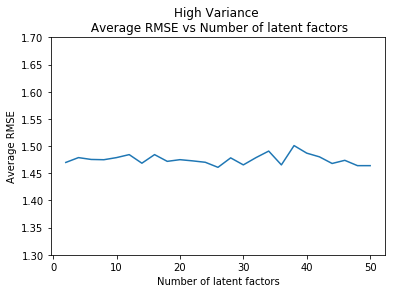

In [274]:
#Question 28
mean_rmse_q28 = []

for i in np.arange(2, 51, 2):
    print ("------------------For k=",k,"--------------------")
    algo = SVD(n_factors = i, random_state = 37)
    rmse = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        newtest = getHighVariance_new(testset)
        predictions = algo.test(newtest)
        rmse.append(accuracy.rmse(predictions))
    mean_rmse_q28.append(round(np.mean(rmse),4))

plt.xlabel("Number of latent factors")
plt.ylabel("Average RMSE")
plt.title("High Variance \n Average RMSE vs Number of latent factors")
plt.plot(kvals, mean_rmse_q28)
plt.ylim([1.3,1.7])
plt.show()

In [168]:
#old values
print("min vale of rmse is",np.min(mean_rmse_q26))
print("min vale of rmse is",np.min(mean_rmse_q27))
print("min vale of rmse is",np.min(mean_rmse_q28))

min vale of rmse is 0.8452
min vale of rmse is 0.8951
min vale of rmse is 1.3458


In [273]:
print("min vale of rmse is",np.min(mean_rmse_q26))
print("min vale of rmse is",np.min(mean_rmse_q27))
print("min vale of rmse is",np.min(mean_rmse_q28))

min vale of rmse is 0.856
min vale of rmse is 0.969
min vale of rmse is 1.4289


In [1]:
#Question 36, 37, 38 and 39

In [4]:
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data = Dataset.load_from_file('ratings.csv', reader=reader)
sim_options = {'name': 'pearson',
               'user_based': True }

t_list = [i for i in range(1,26)]

splits = 10

In [5]:
def plot_ranking(t_list, precisions, recalls, title):
    plt.plot(t_list, precisions, color="blue")
    plt.xlabel("t")
    plt.ylabel("Precision")
    plt.title(title + " " + "Precision vs t")
    plt.show()
    
    plt.plot(t_list, recalls, color="green")
    plt.xlabel("t")
    plt.ylabel("Recall")
    plt.title(title + " " + "Recall vs t")
    plt.show()
    
    plt.plot(recalls, precisions, color="red")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title + " " + "Precision vs Recall")
    plt.show()

In [6]:
def plot_ranking_all(t_list, precisions_list, recalls_list):
    plt.plot(t_list, precisions_list[0], color="blue", label = "KNN")
    plt.plot(t_list, precisions_list[1], color="green", label = "NNMF")
    plt.plot(t_list, precisions_list[2], color="red", label = "MF")
    plt.xlabel("t")
    plt.ylabel("Precision")
    plt.title("Precision vs t")
    plt.legend(loc="best")
    plt.show()
    
    plt.plot(t_list, recalls_list[0], color="blue", label = "KNN")
    plt.plot(t_list, recalls_list[1], color="green", label = "NNMF")
    plt.plot(t_list, recalls_list[2], color="red", label = "MF")
    plt.xlabel("t")
    plt.ylabel("Recall")
    plt.title("Recall vs t")
    plt.legend(loc="best")
    plt.show()
    
    plt.plot(recalls_list[0], precisions_list[0], color="blue", label = "KNN")
    plt.plot(recalls_list[1], precisions_list[1], color="green", label = "NNMF")
    plt.plot(recalls_list[2], precisions_list[2], color="red", label = "MF")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision vs Recall")
    plt.legend(loc="best")
    plt.show()

In [19]:
#Question 36: KNN

k_best = 24

In [20]:
precisions = []
recalls = []

for n in t_list:
    kf = KFold(n_splits=splits)
    precision = 0.0
    recall = 0.0
    
    print ("n=",n)
    for trainset, testset in kf.split(data):
        algo = prediction_algorithms.knns.KNNWithMeans(k=k_best, sim_options=sim_options)
        algo.fit(trainset)
        predictions = algo.test(testset)
        
        user_ratings = defaultdict(list)
        user_predicted = defaultdict(list)
        for uid, iid, true_r, est, _ in predictions:
            user_ratings[uid].append((iid, true_r))
            user_predicted[uid].append((iid, est))
            
            
        user_ratings_filtered = defaultdict(list)
        user_predicted_filtered = defaultdict(list)
        for uid, ratings_list in user_predicted.items():
            ratings_list.sort(key=lambda x: x[1], reverse=True)
            movie_ids_sorted = list(map(lambda x:x[0], ratings_list))
            user_predicted_filtered[uid] = movie_ids_sorted[:n]
            
        user_list = []
        for uid, ratings_list in user_ratings.items():
            u = filter(lambda x:x[1]>=3,ratings_list)
            liked_movies = list(map(lambda x:x[0],u))
            if (len(liked_movies) >= n):
                user_ratings_filtered[uid] = liked_movies
                user_list.append(uid)
                
        precision_fold = 0.0
        recall_fold = 0.0
        for uid in user_list:
            g_len = float(len(user_ratings_filtered[uid]))
            s_len = float(len(user_predicted_filtered[uid]))
            c_len = float(len(set(user_ratings_filtered[uid])&set(user_predicted_filtered[uid])))
            
            precision_fold += c_len/s_len
            recall_fold += c_len/g_len
            
        precision_fold /= float(len(user_list))
        recall_fold /= float(len(user_list))
        
        precision += precision_fold
        recall += recall_fold
            
    precisions.append(precision/float(splits))
    recalls.append(recall/float(splits))
    
knn_precisions = precisions
knn_recalls = recalls

n= 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
n= 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similari

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
n= 12
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity m

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
n= 23
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity mat

In [29]:
with open('knn_precisions', 'wb') as f:
    pickle.dump(knn_precisions, f)
with open('knn_recalls', 'wb') as f:
    pickle.dump(knn_recalls, f)

In [8]:
with open('knn_precisions', 'rb') as f:
    knn_precisions = pickle.load(f)
with open('knn_recalls', 'rb') as f:
    knn_recalls = pickle.load(f)

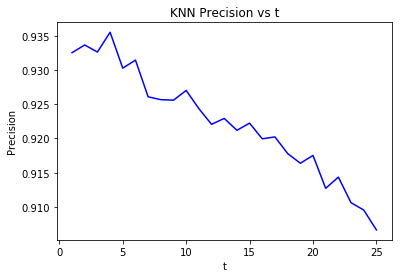

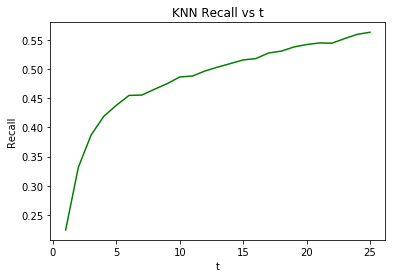

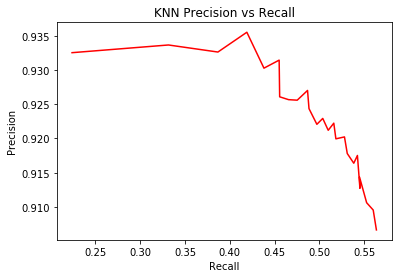

In [28]:
plot_ranking(t_list, knn_precisions, knn_recalls, "KNN")

In [10]:
#Question 37: NNMF

In [21]:
min_k_q18= 18

In [22]:
precisions = []
recalls = []

for n in t_list:
    kf = KFold(n_splits=splits)
    precision = 0.0
    recall = 0.0
    users = 0.0
    print ("n=",n)
    for trainset, testset in kf.split(data):
        algo = prediction_algorithms.matrix_factorization.NMF(n_factors=min_k_q18, biased =False)
        algo.fit(trainset)
        predictions = algo.test(testset)
        
        user_ratings = defaultdict(list)
        user_predicted = defaultdict(list)
        for uid, iid, true_r, est, _ in predictions:
            user_ratings[uid].append((iid, true_r))
            user_predicted[uid].append((iid, est))
            
            
        user_ratings_filtered = defaultdict(list)
        user_predicted_filtered = defaultdict(list)
        for uid, ratings_list in user_predicted.items():
            ratings_list.sort(key=lambda x: x[1], reverse=True)
            movie_ids_sorted = list(map(lambda x:x[0], ratings_list))
            user_predicted_filtered[uid] = movie_ids_sorted[:n]
            
        user_list = []
        for uid, ratings_list in user_ratings.items():
            u = filter(lambda x:x[1]>=3,ratings_list)
            liked_movies = list(map(lambda x:x[0],u))
            if (len(liked_movies) >= n):
                user_ratings_filtered[uid] = liked_movies
                user_list.append(uid)
                
        precision_fold = 0.0
        recall_fold = 0.0
        for uid in user_list:
            g_len = float(len(user_ratings_filtered[uid]))
            s_len = float(len(user_predicted_filtered[uid]))
            c_len = float(len(set(user_ratings_filtered[uid])&set(user_predicted_filtered[uid])))
            
            precision_fold += c_len/s_len
            recall_fold += c_len/g_len
            
        precision_fold /= float(len(user_list))
        recall_fold /= float(len(user_list))
        
        precision += precision_fold
        recall += recall_fold
            
    precisions.append(precision/float(splits))
    recalls.append(recall/float(splits))
    
nmf_precisions = precisions
nmf_recalls = recalls

n= 1
n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9
n= 10
n= 11
n= 12
n= 13
n= 14
n= 15
n= 16
n= 17
n= 18
n= 19
n= 20
n= 21
n= 22
n= 23
n= 24
n= 25


In [30]:
with open('nmf_precisions', 'wb') as f:
    pickle.dump(nmf_precisions, f)
with open('nmf_recalls', 'wb') as f:
    pickle.dump(nmf_recalls, f)

In [12]:
with open('nmf_precisions', 'rb') as f:
    nmf_precisions = pickle.load(f)
with open('nmf_recalls', 'rb') as f:
    nmf_recalls = pickle.load(f)

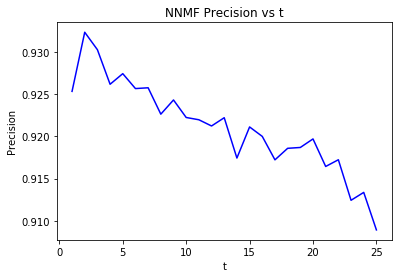

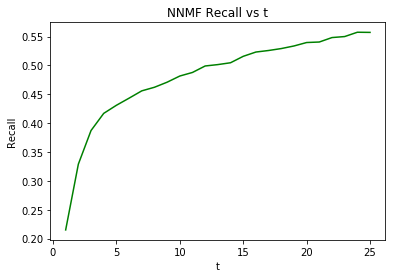

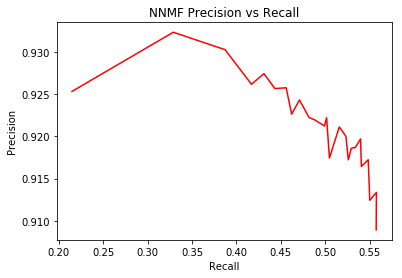

In [31]:
plot_ranking(t_list, nmf_precisions, nmf_recalls, "NNMF")

In [14]:
#Question 38: MF
k_for_q24 = 28

In [23]:
precisions = []
recalls = []

for n in t_list:
    kf = KFold(n_splits=splits)
    precision = 0.0
    recall = 0.0
    users = 0.0
    print ("n=",n)
    for trainset, testset in kf.split(data):
        algo = prediction_algorithms.matrix_factorization.SVD(n_factors = k_for_q24, random_state = 37)
        algo.fit(trainset)
        predictions = algo.test(testset)
        
        user_ratings = defaultdict(list)
        user_predicted = defaultdict(list)
        for uid, iid, true_r, est, _ in predictions:
            user_ratings[uid].append((iid, true_r))
            user_predicted[uid].append((iid, est))
            
            
        user_ratings_filtered = defaultdict(list)
        user_predicted_filtered = defaultdict(list)
        for uid, ratings_list in user_predicted.items():
            ratings_list.sort(key=lambda x: x[1], reverse=True)
            movie_ids_sorted = list(map(lambda x:x[0], ratings_list))
            user_predicted_filtered[uid] = movie_ids_sorted[:n]
            
        user_list = []
        for uid, ratings_list in user_ratings.items():
            u = filter(lambda x:x[1]>=3,ratings_list)
            liked_movies = list(map(lambda x:x[0],u))
            if (len(liked_movies) >= n):
                user_ratings_filtered[uid] = liked_movies
                user_list.append(uid)
                
        precision_fold = 0.0
        recall_fold = 0.0
        for uid in user_list:
            g_len = float(len(user_ratings_filtered[uid]))
            s_len = float(len(user_predicted_filtered[uid]))
            c_len = float(len(set(user_ratings_filtered[uid])&set(user_predicted_filtered[uid])))
            
            precision_fold += c_len/s_len
            recall_fold += c_len/g_len
            
        precision_fold /= float(len(user_list))
        recall_fold /= float(len(user_list))
        
        precision += precision_fold
        recall += recall_fold
            
    precisions.append(precision/float(splits))
    recalls.append(recall/float(splits))
    
mf_precisions = precisions
mf_recalls = recalls

n= 1
n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9
n= 10
n= 11
n= 12
n= 13
n= 14
n= 15
n= 16
n= 17
n= 18
n= 19
n= 20
n= 21
n= 22
n= 23
n= 24
n= 25


In [33]:
with open('mf_precisions', 'wb') as f:
    pickle.dump(mf_precisions, f)
with open('mf_recalls', 'wb') as f:
    pickle.dump(mf_recalls, f)

In [15]:
with open('mf_precisions', 'rb') as f:
    mf_precisions = pickle.load(f)
with open('nmf_recalls', 'rb') as f:
    mf_recalls = pickle.load(f)

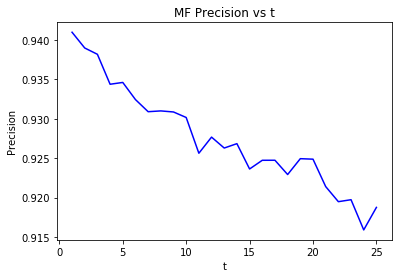

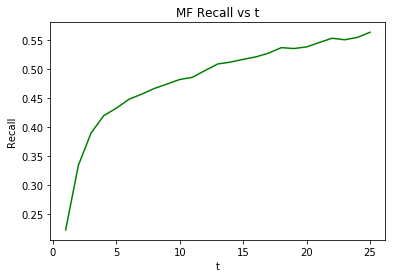

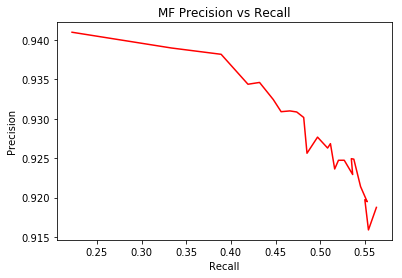

In [32]:
plot_ranking(t_list, mf_precisions, mf_recalls, "MF")

In [17]:
# Question 39

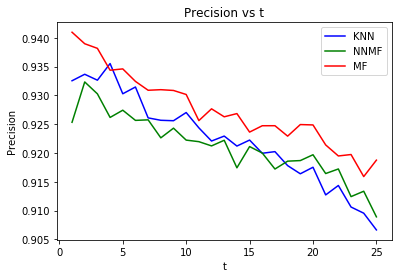

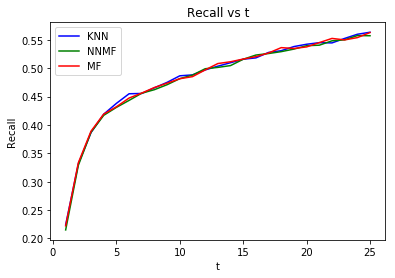

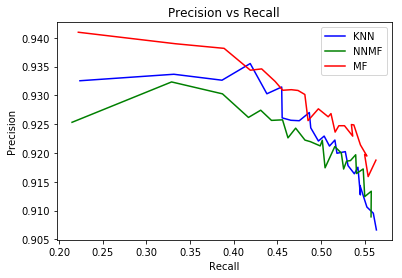

In [34]:
plot_ranking_all(t_list, [knn_precisions, nmf_precisions, mf_precisions], [knn_recalls, nmf_recalls, mf_recalls])